# Programming for Data Analysis Assignment 2

Author - Sean Humphreys

## Contents

1. [Problem Statement](#problem-statement)

1. [Software Libraries](#software-libraries)

2. [Data Exploration and Cleansing](#data-exploration-and-cleansing)

    1. [Carbon Dioxide Data](#co2-data)

        1. [Luthi et al. co2 Data](#luthi-et-al-co2-data)

        2. [IPCC CO2 Data](#ipcc-CO2-data)

        3. [Mauna Loa CO2 Data](#mauna-loa-co2-data)

    2. [Temperature Data](#temperature-data)

        1. [Jouzel (2007) Temperature Data](#jouzel-2007-temperature-data)

        2. [NOAA Temperature Data](#noaa-temperature-data)

        3. [Further Temperature Data](#further-temperature-data)

    3. [Methane Data](#methane-data)

    4. [Irish Data](#irish-data)

        1. [Irish Temerature Data](#irish-temperature-data)

        2. [Irish Precipitation Data](#irish-precipitation-data)

    4. [Fused Dataset](#fused-dataset)


2. [Analysis](#analysis)

    1. [Carbon Dioxide](#carbon-dioxide)

    2. [Temperature](#temperature)

    3. [Methane](#methane)

3. [Irish Context](#irish-context)

    1. [Irish Context - Temperature](#irish-context---temperature)
    
    2. [Irish Context - Precipitation](#irish-context---precipitation)

4. [Predictive Model](#predictive-model)

2. [References](#references)

3. [Associated Reading](#associated-reading)

---

## Problem Statement <a id="problem-statement"></a>

+ Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

+ Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

+ Examine Irish context:
    
    + [Climate change signals](/literature/the_emergence_of_a_climate_change_signal_in_long_term_irish_meteorological_observations.pdf) : (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

+ Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

+ For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

+ Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

+ Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage)

---

## Software Libraries <a id="software-libraries"></a>

- [Datetime](https://docs.python.org/3/library/datetime.html) (https://docs.python.org/3/library/datetime.html - last accessed 21 Dec. 2023) - supplies classes for manipulating dates and times.

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 13 Dec. 2023) - is an open-source software library for creating static, animated, and interactive visualisations in Python.

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the Python programming language. A Pandas DataFrame is a dictionary like container for series objects. A DataFrame is the primary Pandas data structure.

- [scikit-learn](https://scikit-learn.org/stable/index.html) (https://scikit-learn.org/stable/index.html) - are a set of tools used for predictive analysis. It is used extensively in machine learning.

- [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 21 Nov. 2023) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses Numpy underneath.

- [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 23 Nov. 2023) - is visualisation software that is built on matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import the required software libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import signal
from datetime import date

---

## Data Exploration and Cleansing <a id="data-exploration-and-cleansing"></a>

The Pandas software library is used to clean and process datasets. 

### Carbon Dioxide Data <a id="carbon-dioxide-data"></a>

####  Luthi et al. Carbon Dixoide Data <a id="luthi-et-al.-carbon-dioxide-data"></a>

The first carbon dataset (CO2) is sourced from Luthi et al (2008.) This dataset is a composite of a number of samples of carbon dioxide data from studies on antarctic ice core analysis. Luthi et al. use the EDC3 chronology to describe the age of the samples in the dataset. This EDC3 chronology discussed further [here](#data-analysis). 

Historic CO2 data in this dataset ranges from the year 1813 to 800k years before present.

To process the data it is read in as a Pandas DataFrame from separate worksheets in an Microsoft Excel file.

In [70]:
# code adapted from https://www.mybib.com/tools/harvard-referencing-generator [Accessed 19 Dec. 2023]
co2_ipcc = pd.read_excel(
    '/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='2.  Vostok-TD-Dome C')
co2_ipcc_new = pd.read_excel(
    '/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='1.  new CO2 data')

DataFrames to capture specific subsets of data from assorted studies in the master dataset are defined. These subsets will be stitched together to create a composite dataset of historic co2 data.

In [71]:
# adapted from code found here - https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/ [Accessed 19 Dec. 2023].
monnin_luthi = co2_ipcc.iloc[6:189, 1:3]
pettit_luthi = co2_ipcc.iloc[19:353, 5:7]
siegenthaler_1_luthi = co2_ipcc.iloc[6:26, 16:18]
siegenthaler_2_luthi = co2_ipcc.iloc[6:328, 12:14]
luthi_luthi = co2_ipcc_new.iloc[16:253, 1:3]

The columns in each dataframe are renamed to logical names.

In [72]:
monnin_luthi.rename(columns=({'Unnamed: 1':'yr_bp', 'Unnamed: 2':'co2_ppmv'}), inplace=True)
pettit_luthi.rename(columns=({'Unnamed: 5':'yr_bp', 'Unnamed: 6':'co2_ppmv'}), inplace=True)
siegenthaler_1_luthi.rename(columns=({'Unnamed: 16':'yr_bp', 'Unnamed: 17':'co2_ppmv'}), inplace=True)
siegenthaler_2_luthi.rename(columns=({'Unnamed: 12':'yr_bp', 'Unnamed: 13':'co2_ppmv'}), inplace=True)
luthi_luthi.rename(columns=({'Unnamed: 1':'yr_bp', 'Unnamed: 2':'co2_ppmv'}), inplace=True)

A function is defined to carry out a number of processing actions on each DataFrame. The `year()` function:

+ creates a columns that calculates the year based on the before present value

+ creates a column that calculates the year before present values

+ drops any rows with null values

In [73]:
def year(sample):
    sample['years_before_2023'] = 2023 - (1950-(sample['yr_bp']))
    sample.dropna(axis=0, inplace=True)
    return sample

Using a for loop, each of the subsets of data can be passed to the `year()` function.

In [74]:
studies = [monnin_luthi ,pettit_luthi, siegenthaler_1_luthi, siegenthaler_2_luthi, luthi_luthi]

for study in studies:
    year(study)

Each of the subsets of co2 data is concatenated into one DataFrame to create a composite of the data in Luthi et al (2008) so that the trending carbon dioxide levels for the 800,000 year period can be plotted.

In [75]:
# code adapted from https://pandas.pydata.org/docs/reference/api/pandas.concat.html [Accessed 13 Dec. 2023]. 
luthi_frames = [monnin_luthi ,pettit_luthi, siegenthaler_1_luthi, siegenthaler_2_luthi, luthi_luthi]

luthi_full_co2_data = pd.concat(luthi_frames, ignore_index = True)

The concatenated dataset is explored.

In [76]:
luthi_full_co2_data.head()

,yr_bp,co2_ppmv,years_before_2023
0,137,280.4,210
1,268,274.9,341
2,279,277.9,352
3,395,279.1,468
4,404,281.9,477


In [77]:
luthi_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   yr_bp              1096 non-null   object
 1   co2_ppmv           1096 non-null   object
 2   years_before_2023  1096 non-null   object
dtypes: object(3)
memory usage: 25.8+ KB


The variables are cast to Pandas Dtypes that can be used for analysis.

In [78]:
# code adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-astype/ [Accessed 15 Dec. 2023].
luthi_full_co2_data = luthi_full_co2_data.astype({'yr_bp':'int', 'co2_ppmv':'float64', 'years_before_2023': 'int'})

In [79]:
luthi_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr_bp              1096 non-null   int64  
 1   co2_ppmv           1096 non-null   float64
 2   years_before_2023  1096 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 25.8 KB


In [80]:
luthi_full_co2_data.head(5)

,yr_bp,co2_ppmv,years_before_2023
0,137,280.4,210
1,268,274.9,341
2,279,277.9,352
3,395,279.1,468
4,404,281.9,477


In [81]:
# code adapted from https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python Accessed 22 Dec. 2023
pd.concat(g for _, g in luthi_full_co2_data.groupby("years_before_2023") if len(g) > 1)

,yr_bp,co2_ppmv,years_before_2023
530,409383,275.2,409456
531,409383,274.2,409456


As can be seen there is two entries for the year -407433. The simplest way to manage this is to drop the year with the smaller value. As the difference is 1 ppmv the effect is negligible.

In [82]:
luthi_full_co2_data.drop(531, axis=0, inplace=True)

####  IPCC CO2 Data <a id="ipcc-co2-data"></a>

The second carbon dioxide dataset is sourced from the [The Intergovernmental Panel on Climate Change (IPCC)](https://www.ipcc.ch/) (https://www.ipcc.ch/). This dataset is a composite of a number of samples of carbon dioxide data from studies on ice core analysis. The samples have been dated using the The Antarctic Ice Core Chronology (AICC2012) system. This is discussed further [here](#data-analysis).

This dataset contains measurements of CO2. The range of years in the composite dataset is from 1950 to 803,182 years from 2023.

The excel spreadsheet with historic IPCC co2 data is read in as a Pandas Dataframe.

In [86]:
ipcc_c02_data = pd.read_excel(
                              '/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/co2/grl52461-sup-0003-supplementary.xls', 
                              sheet_name='all records')

DataFrames to capture specific subsets of data from assorted studies in the master dataset are defined. These subsets will be stitched together to create a composite dataset of historic co2 data.

In [102]:
# use iloc to create subsets of data from the master dataset
rubino = ipcc_c02_data.iloc[90:, [83, 86]]
macfarling = ipcc_c02_data.iloc[137:, 68:70]
monnin = ipcc_c02_data.iloc[25:120, 2:4]
marcott = ipcc_c02_data.iloc[31:321, 98:100]
ahn = ipcc_c02_data.iloc[7:202, 89:91]
bereiter = ipcc_c02_data.iloc[28:106, 34:36]
bereiter_2 = ipcc_c02_data.iloc[60:154, 39:41]
schneider = ipcc_c02_data.iloc[6:, 65:67]
petit = ipcc_c02_data.iloc[124:348, 7:9]
siegenthaler = ipcc_c02_data.iloc[6:26, 20:22]
siegenthaler_2 = ipcc_c02_data.iloc[6:226, 15:17]
bereiter_3 = ipcc_c02_data.iloc[37:, 102:104]

The columns in each dataframe are renamed to logical names

In [104]:
rubino.rename(columns=({'Unnamed: 83':'yr_bp', 'Unnamed: 86':'co2_ppmv'}), inplace=True)
macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'yr_bp', 'Unnamed: 69':'co2_ppmv'}), inplace=True)
monnin.rename(columns=({'Unnamed: 2':'yr_bp', 'Unnamed: 3':'co2_ppmv'}), inplace=True)
marcott.rename(columns=({'Unnamed: 98':'yr_bp', 'Unnamed: 99':'co2_ppmv'}), inplace=True)
ahn.rename(columns=({'Unnamed: 89':'yr_bp', 'Unnamed: 90':'co2_ppmv'}), inplace=True)
bereiter.rename(columns=({'Unnamed: 34':'yr_bp', 'Unnamed: 35':'co2_ppmv'}), inplace=True)
bereiter_2.rename(columns=({'Unnamed: 39':'yr_bp', 'Unnamed: 40':'co2_ppmv'}), inplace=True)
schneider.rename(columns=({'Unnamed: 65':'yr_bp', 'Unnamed: 66':'co2_ppmv'}), inplace=True)
petit.rename(columns=({'Unnamed: 7':'yr_bp', 'Unnamed: 8':'co2_ppmv'}), inplace=True)
siegenthaler.rename(columns=({'Unnamed: 20':'yr_bp', 'Unnamed: 21':'co2_ppmv'}), inplace=True)
siegenthaler_2.rename(columns=({'Unnamed: 15':'yr_bp', 'Unnamed: 16':'co2_ppmv'}), inplace=True)
bereiter_3.rename(columns=({'Unnamed: 102':'yr_bp', 'Unnamed: 103':'co2_ppmv'}), inplace=True)


Using a for loop, each of the subsets of data can be passed to the `year()` function.

In [105]:
studies = [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]

for study in studies:
    year(study)

Each of the subsets of co2 data is concatenated into one DataFrame to create a composite of the subsets of data. Fom this DataFrame the trending levels of carbon dioxide over time can be plotted.

In [106]:
# code adapted from https://pandas.pydata.org/docs/reference/api/pandas.concat.html [Accessed 13 Dec. 2023].
frames = [rubino, macfarling, monnin, marcott, ahn, bereiter, bereiter_2, schneider, petit, siegenthaler, siegenthaler_2, bereiter_3]

ipcc_full_co2_data = pd.concat(frames, ignore_index = True)

Inspecting the first 5 rows of the DataFrame gives a visual insight into the variables in the DataFrame.

Using the `info ()` gives an indication of the datatypes in the concatenated DataFrame. All variables are *objects*. This limits they type of analysis that can be carried out on these variables.

In [107]:
ipcc_full_co2_data.head()

,yr_bp,co2_ppmv,years_before_2023
0,-8.562971,316.33402,64.437029
1,-8.102786,316.101403,64.897214
2,-7.872424,314.572166,65.127576
3,-7.257539,315.270355,65.742461
4,-7.203374,316.32538,65.796626


Using the `info ()` gives an indication of the datatypes in the concatenated DataFrame. All variables are *objects*. This limits they type of analysis that can be carried out on these variables.

In [108]:
ipcc_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   yr_bp              1852 non-null   object
 1   co2_ppmv           1852 non-null   object
 2   years_before_2023  1852 non-null   object
dtypes: object(3)
memory usage: 43.5+ KB


The Pandas `astype()` function can be used to cast a Pandas object to a specific type of datatype. The *yr_bp* variable is a measure of the year and as such can be a floating p point integer e.g. -8.56291 years before present represents 8 whole years and .56291 of a whole year. The same can be said of the *years_before_present* variable. The *year* variable is an integer value assigned as the name of the year. In this context it can be left as an object as it is more of a label than a value that will be used for analysis.

In [109]:
ipcc_full_co2_data = ipcc_full_co2_data.astype({'yr_bp':'int', 'co2_ppmv':'float64', 'years_before_2023':'int'})

In [110]:
ipcc_full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr_bp              1852 non-null   int64  
 1   co2_ppmv           1852 non-null   float64
 2   years_before_2023  1852 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 43.5 KB


In [98]:
ipcc_full_co2_data.head()

,yr_bp,co2_ppmv,years_before_2023
0,-8,316.334020,64
1,-8,316.101403,64
2,-7,314.572166,65
3,-7,315.270355,65
4,-7,316.325380,65


Check for duplicate values in the *years_before_2023* column.

In [161]:
pd.concat(g for _, g in ipcc_full_co2_data.groupby("years_before_2023") if len(g) > 1)

ValueError: No objects to concatenate

Duplicates are removed from the *years_before_2023* column.

In [125]:
ipcc_full_co2_data.drop_duplicates(subset='years_before_2023', keep='first', inplace=True)

In [126]:
ipcc_full_co2_data

,yr_bp,co2_ppmv,years_before_2023
0,-8,316.334020,64
2,-7,314.572166,65
6,-6,315.342074,66
7,-4,314.713961,68
8,-3,313.171057,69
...,...,...,...
1847,803925,202.921723,803998
1848,804009,207.498645,804082
1849,804522,204.861938,804595
1850,805132,202.226839,805205


####  Mauna Loa CO2 Data <a id="mauna-loa-cO2-data"></a>

The most recent CO2 dataset in a Comma Separated Value (CSV) file is available from from https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv. This dataset contains measurements of annual mean CO2 expressed as a mole fraction in dry air. The range of years in the dataset is from 1959 to 2022.

Using Pandas the CSV file is read in as a Pandas DataFrame.

In [152]:
# https://gml.noaa.gov/ccgg/trends/data.html
mauna_loa_co2 = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv', skiprows=43)

The columns in the dataset are renamed to logical names.

In [153]:
# code adapted from # https://sparkbyexamples.com/pandas/rename-columns-with-list-in-pandas-dataframe/
cols = ['year', 'co2_ppmv', 'unc']

mauna_loa_co2.columns = cols

An unnecessary column is removed from the dataset.

In [154]:
# code adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html [Accessed 13 Dec. 2023]
mauna_loa_co2.drop(['unc'], axis=1, inplace=True)

An additional column is added to the dataset that calculates the year no before the 2023.

In [155]:
mauna_loa_co2['years_before_2023'] = 2023 - mauna_loa_co2['year']

# sort the data based on the year before present. Based on code from - https://saturncloud.io/blog/how-to-sort-pandas-dataframe-from-one-column/ [Accessed 13 Dec. 2023].
mauna_loa_co2 = mauna_loa_co2.sort_values('years_before_2023')

The columns in the dataset are reordered.

In [156]:
# adapted from code found here - https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns [Accessed 13 Dec. 2023]
mauna_loa_co2 = mauna_loa_co2.reindex(columns=['co2_ppmv', 'year', 'years_before_2023'])

In [157]:
mauna_loa_co2.head()

,co2_ppmv,year,years_before_2023
63,418.53,2022,1
62,416.41,2021,2
61,414.21,2020,3
60,411.65,2019,4
59,408.72,2018,5


The DataFrame Dtypes are checked.

In [158]:
mauna_loa_co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 63 to 0
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   co2_ppmv           64 non-null     float64
 1   year               64 non-null     int64  
 2   years_before_2023  64 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


Any rows with duplicate years are dropped.

In [162]:
mauna_loa_co2.drop_duplicates(subset='years_before_2023', keep='first', inplace=True)

### Temperature Data <a id="temperature-data"></a>

#### Jouzel (2007) Temperature Data <a id="jouzel-(2007)-temperature-data"></a>

Data from Jouzel et al (2007) is from a high-resolution deuterium profile from European Project for Ice Coring in Antarctica (EPICA) Dome C ice core. As per the metadata available for this data set, available from [here](https://doi.pangaea.de/10.1594/PANGAEA.683655) (https://doi.pangaea.de/10.1594/PANGAEA.683655), temperature was estimated after correction for sea-water isotopic composition (Bintanja, van de Wal and Oerlemans, 2005) and for ice sheet elevation on EDC3 age scale (Parrenin et al, 2007). The EDC3 age scale is discussed further [here](#carbon-dioxide).

The dataset is read into a Pandas DataFrame using Python.

In [164]:
jouzel_temp = pd.read_csv('/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/temperature/epicaDC.deuttemp.EDC3-AICC.csv')

The *jouzel_temp* DataFrame is explored to understand the data in the dataset. The first and last 5 rows of the DatFrame are printed. From visualising this information the dataset appears to consist of seven variables. There appears to be a *temp* variable that is in Kelvin. Two variables that describe a chronology for the temperature value - *EDC3* and *AICC2012*. The systems are discussed in further detail [here](#carbon-dioxide).

From the data in this dataset it should be possible to calculate the year when the corresponding temperature measurement was taken. Once this is known a temperature anomaly value can be calculated.

Temperature anomaly is defined as:

*"The term temperature anomaly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value."* (www.ncei.noaa.gov, n.d.).

From the Jouzel dataset the following measurements can be calculated:

+ age of a sample

+ temperature value in degrees celsius of the sample

+ temperature anomaly for a desired period of the sample

In [165]:
# print the first five rows of data
jouzel_temp.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [166]:
jouzel_temp.tail()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
5814,5815,3197.70,816871.6,817562.0,-432.2,211.0,1.529
5815,5816,3198.25,817693.6,818631.0,-431.4,211.2,1.548
5816,5817,3198.80,818505.5,819700.0,-430.3,211.3,1.576
5817,5818,3199.35,819303.1,820769.0,-429.8,211.4,1.589
5818,5819,3199.90,820093.9,821838.0,-430.0,211.4,1.583


The Pandas data types can be understood by using the `info()` method.

In [167]:
jouzel_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


The NOAA temperature data explored in the next [section](#noaa-temperature-data) is a subset of this data using the EDC3 chronology with a temperature anomaly calculated as the temperature difference from the average of the last 1000 years.

It should therefore be possible to create a subset of this data for the AICC2012 chronology with a temperature anomaly  calculated as the temperature difference from the average of the last 1000 years.

Firstly, unnecessary columns are dropped from DataFrame.

In [168]:
jouzel_temp.drop(['bag', 'ztop', 'deutfinal', 'acc-EDC3beta'], axis = 1, inplace = True)

A column to convert Kelvin to celsius is added.

In [169]:
jouzel_temp['celsius'] = jouzel_temp['temp'] - 273.15

The mean temperature for approximately the last 1000 years is assigned to a variable

In [170]:
average = jouzel_temp['celsius'][0:87].mean()

The temperature anomaly in celsius is calculated.

In [171]:
jouzel_temp['anomaly'] = jouzel_temp['celsius'] - average

A column to calculate the years from present is added to the DataFrame.

In [172]:
# calculate years before present aicc2012 chronology
jouzel_temp['aicc2012_years_before_2023'] = 2023 - (1950 - jouzel_temp['AICC2012'])

# calculate years before present EDC3 chronology
jouzel_temp['edc3_years_before_2023'] = 2023 - (1950 - jouzel_temp['EDC3béta'])

The DataFrame is printed to validate the calculations.

In [173]:
jouzel_temp

,EDC3béta,AICC2012,temp,celsius,anomaly,aicc2012_years_before_2023,edc3_years_before_2023
0,-50.00000,-55.000000,218.3,-54.85,0.888506,18.000000,23.00000
1,-43.55977,-50.513333,218.3,-54.85,0.888506,22.486667,29.44023
2,-37.44019,-46.026667,218.3,-54.85,0.888506,26.973333,35.55981
3,-31.64156,-41.540000,218.3,-54.85,0.888506,31.460000,41.35844
4,-24.55278,-34.516667,218.3,-54.85,0.888506,38.483333,48.44722
...,...,...,...,...,...,...,...
5814,816871.60000,817562.000000,211.0,-62.15,-6.411494,817635.000000,816944.60000
5815,817693.60000,818631.000000,211.2,-61.95,-6.211494,818704.000000,817766.60000
5816,818505.50000,819700.000000,211.3,-61.85,-6.111494,819773.000000,818578.50000
5817,819303.10000,820769.000000,211.4,-61.75,-6.011494,820842.000000,819376.10000


The DataFrame Pandas Dtypes are explored.

In [174]:
jouzel_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDC3béta                    5819 non-null   float64
 1   AICC2012                    5819 non-null   float64
 2   temp                        5819 non-null   float64
 3   celsius                     5819 non-null   float64
 4   anomaly                     5819 non-null   float64
 5   aicc2012_years_before_2023  5819 non-null   float64
 6   edc3_years_before_2023      5819 non-null   float64
dtypes: float64(7)
memory usage: 318.4 KB


The *years_before_2023* variables are converted to integers.

In [176]:
jouzel_temp = jouzel_temp.astype({'aicc2012_years_before_2023':'int', 'edc3_years_before_2023':'int'})

In [177]:
jouzel_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDC3béta                    5819 non-null   float64
 1   AICC2012                    5819 non-null   float64
 2   temp                        5819 non-null   float64
 3   celsius                     5819 non-null   float64
 4   anomaly                     5819 non-null   float64
 5   aicc2012_years_before_2023  5819 non-null   int64  
 6   edc3_years_before_2023      5819 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 318.4 KB


Any rows with duplicate years are dropped from the dataset.

In [204]:
jouzel_temp = jouzel_temp.drop_duplicates(subset='aicc2012_years_before_2023', keep='first', inplace=True)

#### NOAA Temperature Data <a id="noaa-temperature-data"></a>

The NOAA is the National Oceanic and Atmospheric Administration. More information on this organisation is available from [here](https://www.noaa.gov/) (https://www.noaa.gov/).

Upon exploration of the NOAA temperature dataset it is apparent the temperature data from the NOAA is essentially a subset of data from Jouzel et al (2007) that has been processed to calculate degrees celsius temperature anomaly. As per the metadeta for the sample, availalbe [here](https://doi.pangaea.de/10.1594/PANGAEA.683655) (https://doi.pangaea.de/10.1594/PANGAEA.683655), the core samples in the dataset have been aged using the EDC3 chronology, discussed further [here](#analysis).

As per the metadata for this dataset the temperature anomaly is calculated as the temperature difference from the average of the last 1000 years.

The data in this is from the year 2000 AD to approximately 800,000 years ago.

Temperature data from the NOAA is read in as a Pandas DataFrame.

In [191]:
# https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac

noaa_temp = pd.read_csv('https://doi.pangaea.de/10.1594/PANGAEA.683655?format=textfile', sep="\t", skiprows=20)

In [192]:
noaa_temp.head()

,Depth ice/snow [m],Age model [ka],δD [‰ SMOW],delta T [°C],Sample ID
0,0.00,-0.050,NaN,NaN,1
1,0.55,-0.044,NaN,NaN,2
2,1.10,-0.037,NaN,NaN,3
3,1.65,-0.032,NaN,NaN,4
4,2.20,-0.025,NaN,NaN,5


In [193]:
noaa_temp.tail()

,Depth ice/snow [m],Age model [ka],δD [‰ SMOW],delta T [°C],Sample ID
5795,3187.25,797.408,-440.2,-8.73,5796
5796,3187.80,798.443,-439.0,-8.54,5797
5797,3188.35,799.501,-441.1,-8.88,5798
5798,3188.90,800.589,-441.4,-8.92,5799
5799,3189.45,801.662,-440.9,-8.82,5800


The columns are renamed to logical names.

In [194]:
noaa_temp.rename(columns=({"Depth ice/snow [m]":"depth_ice_snow_m", "Age model [ka]":"age_model_ka", "δD [‰ SMOW]":"δd_‰_smow", "delta T [°C]":"delta_t_c", "Sample ID":"sample_id"}), inplace=True)

In [195]:
noaa_temp.head()

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id
0,0.00,-0.050,NaN,NaN,1
1,0.55,-0.044,NaN,NaN,2
2,1.10,-0.037,NaN,NaN,3
3,1.65,-0.032,NaN,NaN,4
4,2.20,-0.025,NaN,NaN,5


Columns are added to calculate the year and the year before 2023.

In [196]:
noaa_temp['years_before_2023'] = 2023 - (1950-(noaa_temp['age_model_ka']*1000))

In [197]:
noaa_temp

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id,years_before_2023
0,0.00,-0.050,NaN,NaN,1,23.0
1,0.55,-0.044,NaN,NaN,2,29.0
2,1.10,-0.037,NaN,NaN,3,36.0
3,1.65,-0.032,NaN,NaN,4,41.0
4,2.20,-0.025,NaN,NaN,5,48.0
...,...,...,...,...,...,...
5795,3187.25,797.408,-440.2,-8.73,5796,797481.0
5796,3187.80,798.443,-439.0,-8.54,5797,798516.0
5797,3188.35,799.501,-441.1,-8.88,5798,799574.0
5798,3188.90,800.589,-441.4,-8.92,5799,800662.0


To understand if the transform that was applied to the Jouzel temperature dataset matches the above dataset they are plotted against one another.

As can be seen the manually transformed dataset does not cancel out the data from the NOAA. For the first 400,000 they are very closely matched. After this the temperature anonalies differ as does the time scales which suggests that before 400,000 years ago the data is somehow processed differntly by the NOAA.

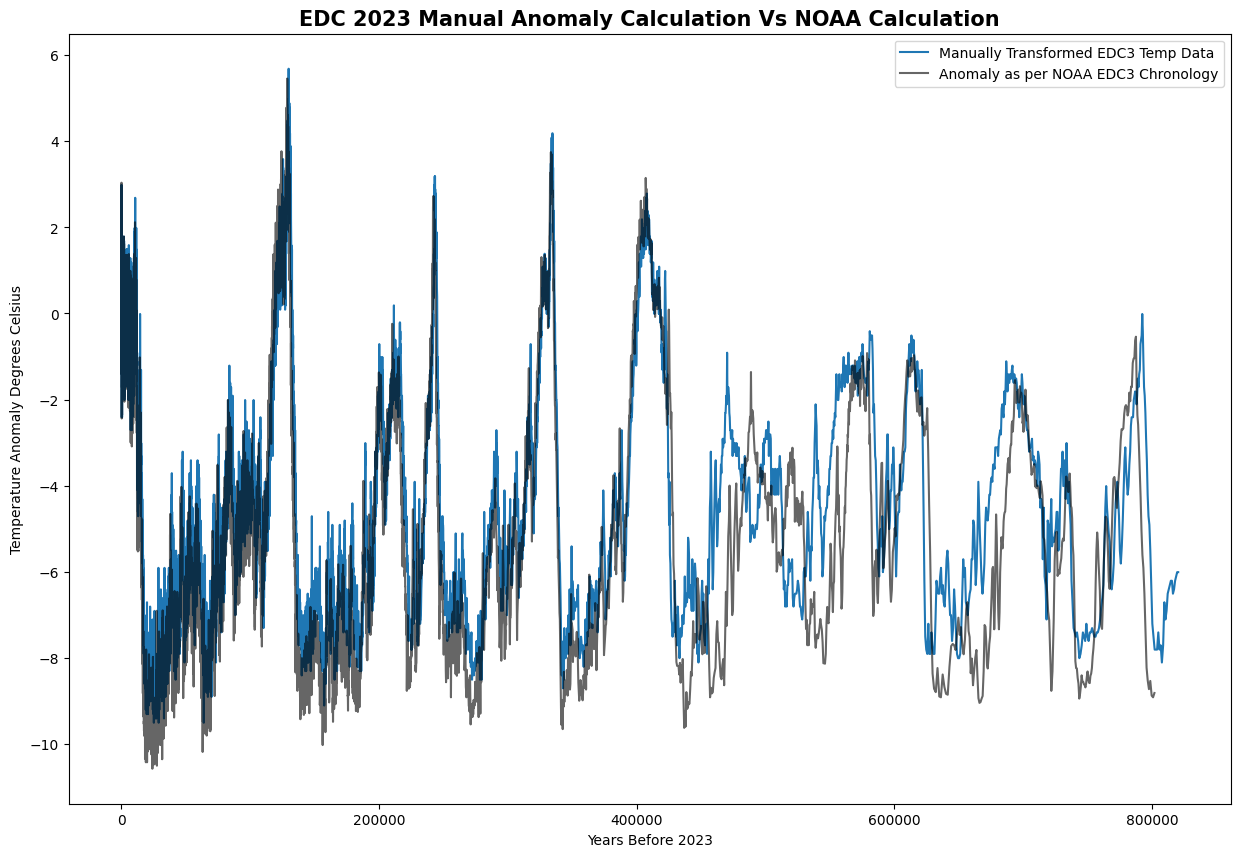

In [202]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15, 10 ))

# plot the results
ax.plot(jouzel_temp['edc3_years_before_2023'], jouzel_temp['anomaly'], label = 'Manually Transformed EDC3 Temp Data')

# adapted from code found here - https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/ [Accessed 19 Dec. 2023]
ax.plot(noaa_temp['years_before_2023'], noaa_temp['delta_t_c'], label = 'Anomaly as per NOAA EDC3 Chronology', color = 'black', alpha = 0.6)
ax.set_xlabel('Years Before 2023')
ax.set_ylabel('Temperature Anomaly Degrees Celsius')

ax.legend()
ax.set_title('EDC 2023 Manual Anomaly Calculation Vs NOAA Calculation', weight ='bold', size=15)
plt.show()

#### Further Temperature Data <a id="further-temperature-data"></a>

A further set of historic temperature data can be created from numerous other data sources. 

The temperature from from 1880 to 2022 in this dataset is sourced from [NASA](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt) (https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt [Accessed 12 Dec. 2023].). [1] The temperature data is the global surface temperature.

Temperature data from 1880 to 800k years from the 2023 was sourced from [https://www.temperaturerecord.org/#sources](https://www.temperaturerecord.org/#sources) accessed 13 Dec. 2023. [2] & [3]. 

Data ranging rom 2000 to 20,000 years ago reconstructed by averaging well-dated, calibrated proxy temperature records from around the world, mostly from ocean margin sediment cores, in addition to lake and ice cores on land.

Data from 20,000 to 800,000 years ago is reconstructed by taking a spatially-weighted average of 59 proxy sea surface temperature records from around the global oceans.

Data from 2000 to 800,000 years ago has been scaled to have a glacial-interglacial range of 4°C based on more comprehensive datasets suggesting that this was the likely magnitude of ice age cooling (Annan and Hargreaves, 2013, Climate of the Past). 

All of the temperature data is compared to the long-term average from 1951 to 1980. Therefore this temperature data uses a different anomaly to the NOAA data and should have different plts when compared to each other.

[1] Credits - Snyder, C.W. 2016.

[2] Credits - Marcott et al, 2013

[3] Credits - Shakun et al, 2012



Using Pandas modern temperature data is read in from the NASA website.

In [214]:
nasa_temp = pd.read_csv('https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt', 
                       skiprows=5, header=None, sep = ' ', skipinitialspace=True, engine='python', names=['year', 'temp_anomaly', 'lowness'])

An unnecessary column is dropped from the DataFrame.

In [215]:
nasa_temp.drop(['lowness'], axis=1, inplace=True)

A column with the year before present is created.

In [216]:
nasa_temp['yr_bp'] = 1950 - nasa_temp['year']

The remaining columns are renamed to a standard naming convention that will be used with temperature data from another source.

In [217]:
nasa_temp = nasa_temp.reindex(columns=['year', 'yr_bp', 'temp_anomaly'])

The NASA data is sorted by year.

In [218]:
nasa_temp = nasa_temp.sort_values('year', ascending=False)

Pre 1800's temperature data is read in from worksheets in an excel spreadsheet that contains all of the historic temperature data.

In [219]:
moberg_temp = pd.read_excel('datasets/historic/temperature/temperature_dataset.xlsx', 
                            sheet_name='2,000 yr',  names=['year', 'yr_bp', 'temp_anomaly', 'x', 'y', 'z'])
clark_temp = pd.read_excel('datasets/historic/temperature/temperature_dataset.xlsx', 
                           sheet_name='20,000 yr', names=['yr_bp', 'temp_anomaly', 'x', 'y', 'z'])
shakun_temp = pd.read_excel('datasets/historic/temperature/temperature_dataset.xlsx', 
                            sheet_name='800,000 yr', names=['yr_bp', 'temp_anomaly', 'x', 'y', 'z'])


Unneeded columns are removed from the DataFrames.

In [220]:
moberg_temp.drop(['x', 'y', 'z'],axis=1, inplace=True)

The remaining columns are re-ordered to make them consistent with the rest of the temperature DataFrames.

In [221]:
moberg_temp.drop(moberg_temp.index[0:100], axis = 0, inplace = True)

A number of precessing tasks are grouped together in a function. The `temp_year()` function removes unneeded columns from the DataFrame and adds a column to calculate the year.

In [222]:
def temp_year(sample):
    sample.drop(['x', 'y', 'z'],axis=1, inplace=True)
    sample['year'] = 1950 - sample['yr_bp']
    return sample

Using a for loop the relevant datasets are paased to the `temp_year()` function.

In [223]:
samples = [clark_temp, shakun_temp]

for sample in samples:
    temp_year(sample)

The columns in the DataFrames are re-ordered to be consistent with the other temperature DataFrames.

In [224]:
clark_temp = clark_temp.reindex(columns=['year', 'yr_bp', 'temp_anomaly'])
shakun_temp = shakun_temp.reindex(columns=['year', 'yr_bp', 'temp_anomaly'])

Rows are dropped from each of the  DataFrames so that there is no overlap between them.

In [225]:
clark_temp.drop(clark_temp.index[0:19], axis = 0, inplace = True)
shakun_temp.drop(shakun_temp.index[0:7], axis = 0, inplace = True)

All of the temperature DataFrames are concatenated to give a composite record of the temperature anomaly over the last 800k years.

In [226]:
frames_temp = [nasa_temp, moberg_temp, clark_temp, shakun_temp]

full_temp_data = pd.concat(frames_temp, ignore_index = True)

In [227]:
full_temp_data['years_before_present'] = 2023 - full_temp_data['year']

In [228]:
full_temp_data

,year,yr_bp,temp_anomaly,years_before_present
0,2022,-72,0.890000,1
1,2021,-71,0.850000,2
2,2020,-70,1.020000,3
3,2019,-69,0.980000,4
4,2018,-68,0.850000,5
...,...,...,...,...
2478,-784050,786000,-0.563657,786073
2479,-787050,789000,-0.991467,789073
2480,-790050,792000,-1.155061,792073
2481,-793050,795000,-2.457660,795073


### Methane Data <a id="methane-data"></a>

A composite record of historic methane data can be formed taking dats from multiple sources.

Methane data from 2023 to 1984 is obtained from the NOAA.

Methane data from 1982 to 1888 was sourced from the NOAA (Etheridge, Steele, Francey, and Langenfelds, 1998).

Methane data from from 1884 to 800,000 previous was sourced from the EPICA Dome C Ice Core dataset (Loulergue et al., 2008).

Methane levels are measured as CH4 mean (ppbv).

Methane data is read into Pandas DataFrames from the respective data sources

In [229]:
methane_1 = pd.read_table('datasets/historic/methane/ch4_annmean_gl.txt', skiprows=45, sep=' ')
methane_2 = pd.read_table('datasets/historic/methane/law_ch4.txt', 
                        sep='\t', skiprows = 647, encoding='unicode_escape', names = ['year', 'ch4_ppb', 'Unnamed: 2', 
                                                                                      'Unnamed: 3', 'Unnamed: 4', '64'])
methane_3 = pd.read_table('datasets/historic/methane/law_ch4.txt', 
                        sep='\t', skiprows = 155, nrows=15, encoding='unicode_escape', 
                        names=['year', 'ch4_ppb', '4', '5', '6', '7'])
methane_4 = pd.read_table('https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt', 
                          sep = ' ', skipinitialspace=True, skiprows = 155, 
                          names=['depth', 'yr_bp', 'ch4_ppb', '4', '5', '6', '7'])



Unnecessary columns are removed from the respective DataFrames. 

In [230]:
methane_1.drop(['#', 'year', 'Unnamed: 3', 'Unnamed: 5', 'mean', 'Unnamed: 7', 'Unnamed: 8', 
                'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'unc'], axis=1, inplace=True)
methane_2.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', '64'], axis=1, inplace=True)
methane_3.drop(['4', '5', '6', '7'], axis=1, inplace=True)
methane_4.drop(['depth', '4', '5', '6', '7'], axis=1, inplace=True)


Columns in *methane_1* are renamed to logical names.

In [231]:
cols = ['year', 'ch4_ppb']
methane_1.columns = cols

Create a year column and calculate the year for the *methane_4* DataFrame.

In [232]:
methane_4['year'] = 1950 - methane_4['yr_bp']

*Years before present* columns are created in each of the DataFrames to calculate the number of years before 2023 that the samples are from. This is achieved by defining a function and passing the DatFrames to the function via a for loop.

In [233]:
def years_before_present(sample):
    sample['years_before_present'] = 2023 - sample['year']

In [234]:
methane_1 = methane_1.sort_values('year', ascending=False)
methane_2 = methane_2.sort_values('year', ascending=False)
methane_3 = methane_3.sort_values('year', ascending=False)
methane_4 = methane_4.sort_values('year', ascending=False)

In [235]:
sets = [methane_1, methane_2, methane_3, methane_4]

for set in sets:
    years_before_present(set)

In [236]:
methane_4 = methane_4.reindex(columns=['year', 'ch4_ppb', 'years_before_present', 'yr_bp'])

In [237]:
frames_methane = [methane_1, methane_2, methane_3, methane_4]

full_methane_data = pd.concat(frames_methane, ignore_index = True)

### Irish Data <a id="irish_data"></a>

Historic Irish temperature and observed precipitation data was sourced from the [World Bank Group](https://climateknowledgeportal.worldbank.org/) (https://climateknowledgeportal.worldbank.org/ Accessed 20 Dec. 2023) website who sourced their [data](https://climateknowledgeportal.worldbank.org/country/ireland/climate-data-historica) (https://climateknowledgeportal.worldbank.org/country/ireland/climate-data-historical Accessed 20 Dec. 2023) from  the climate research unit in the University of East Anglia (https://www.uea.ac.uk/groups-and-centres/climatic-research-unit Accessed 20 Dec. 2023).

A monthly data set of weather observations from Dublin Airport for the period of 1942 to 2003 was obatined from [Met Eireann](https://www.met.ie/about-us) (https://www.met.ie/about-us). This data ws sourced from [here](https://www.met.ie/climate/available-data/historical-data) (https://www.met.ie/climate/available-data/historical-data).

#### Irish Temperature Data <a id="irish_temperature_data"></a>

Read in historic Irish annnual mean temperature data and view the first five lines of the dataset to get an overview  the variables in the dataset.

In [238]:
irish_temp_data = pd.read_csv('datasets/historic/ireland/temp/observed_annual_average_mean_surface_air_temperature_of_ireland_for_1901_2022.csv')

In [239]:
irish_temp_data.head()

,Category,Annual Mean,5-yr smooth
0,1901,8.83,8.86
1,1902,8.85,8.84
2,1903,8.81,8.83
3,1904,8.79,8.83
4,1905,9.00,8.85


The columns in the dataset are renamed to Python friendly names.

In [240]:
irish_temp_data.rename(columns={'Category': 'year', 'Annual Mean': 'annual_mean', '5-yr smooth': '5_yr_smooth'}, inplace=True)


The data types are understood using the Pandas `info()` method.

In [241]:
irish_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         122 non-null    int64  
 1   annual_mean  122 non-null    float64
 2   5_yr_smooth  122 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


Create a time series using the year as the index.

In [242]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
irish_temp_data['time_series'] = pd.to_datetime(irish_temp_data['year'], format='%Y')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
irish_temp_data = irish_temp_data.set_index('time_series')

In [243]:
irish_temp_data['median'] = irish_temp_data['annual_mean'].median()

In [244]:
irish_temp_data

,year,annual_mean,5_yr_smooth,median
time_series,,,,
1901-01-01,1901,8.83,8.86,9.31
1902-01-01,1902,8.85,8.84,9.31
1903-01-01,1903,8.81,8.83,9.31
1904-01-01,1904,8.79,8.83,9.31
1905-01-01,1905,9.00,8.85,9.31
...,...,...,...,...
2018-01-01,2018,9.69,9.89,9.31
2019-01-01,2019,9.86,9.95,9.31
2020-01-01,2020,9.78,9.99,9.31


Read in monthly Irish weather data from Dublin Airport as a Pandas DataFrame.

In [245]:
da_monthly_weather_data = pd.read_csv('datasets/historic/ireland/temp/mly532.csv', skiprows = 19)

Print the first five rows of the DataFrame to get an overview. The month and year variables are in separate columns. To create a time series these to variables need to be combined.

In [246]:
da_monthly_weather_data.head(5)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1941,11,6.9,14.0,-3.1,9.9,3.9,67.2,-5.7,12.0,,56.1
1,1941,12,6.5,12.7,-3.6,9.1,3.9,41.7,-7.6,12.5,,46.1
2,1942,1,4.3,11.9,-3.1,6.9,1.7,91.9,-9.5,13.1,,72.8
3,1942,2,2.9,11.6,-4.3,5.8,-0.0,25.8,-10.7,9.0,,51.4
4,1942,3,6.3,16.2,-6.1,9.4,3.2,76.4,-8.3,10.7,,73.9


To combine the year and month variables they are appended to a list and added into the DataFrame in the *date* column.

In [247]:
# adapted from code found at - https://stackoverflow.com/questions/48304927/cleanly-combine-year-and-month-columns-to-single-date-column-with-pandas [Accessed 21 Dec. 2023].
DATE = []
for y, m in zip(da_monthly_weather_data.year, da_monthly_weather_data.month):
    DATE.append(date(y, m, 1))
    
da_monthly_weather_data['date'] = DATE

In [248]:
da_monthly_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    985 non-null    int64  
 1   month   985 non-null    int64  
 2   meant   985 non-null    float64
 3   maxtp   985 non-null    float64
 4   mintp   985 non-null    float64
 5   mnmax   985 non-null    float64
 6   mnmin   985 non-null    float64
 7   rain    985 non-null    float64
 8   gmin    985 non-null    object 
 9   wdsp    985 non-null    float64
 10  maxgt   985 non-null    object 
 11  sun     985 non-null    float64
 12  date    985 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 100.2+ KB


In [249]:
da_monthly_weather_data['time_series'] = pd.to_datetime(da_monthly_weather_data['date'], format='%d/%m/%Y')

da_monthly_weather_data = da_monthly_weather_data.set_index('time_series')

In [250]:
da_monthly_weather_data

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,date
time_series,,,,,,,,,,,,,
1941-11-01,1941,11,6.9,14.0,-3.1,9.9,3.9,67.2,-5.7,12.0,,56.1,1941-11-01
1941-12-01,1941,12,6.5,12.7,-3.6,9.1,3.9,41.7,-7.6,12.5,,46.1,1941-12-01
1942-01-01,1942,1,4.3,11.9,-3.1,6.9,1.7,91.9,-9.5,13.1,,72.8,1942-01-01
1942-02-01,1942,2,2.9,11.6,-4.3,5.8,-0.0,25.8,-10.7,9.0,,51.4,1942-02-01
1942-03-01,1942,3,6.3,16.2,-6.1,9.4,3.2,76.4,-8.3,10.7,,73.9,1942-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,2023,7,14.9,22.0,7.0,18.6,11.2,149.2,3.7,8.9,35,115.3,2023-07-01
2023-08-01,2023,8,15.4,22.5,8.3,19.3,11.5,119.4,3.2,9.1,47,139.7,2023-08-01
2023-09-01,2023,9,14.5,26.1,4.3,18.7,10.3,134.0,-0.3,8.0,47,150.2,2023-09-01


#### Irish Precipitation Data <a id="irish_temperature_data"></a>

Historic Irish precipitation data from the [World Bank Group](https://climateknowledgeportal.worldbank.org/) (https://climateknowledgeportal.worldbank.org/ Accessed 20 Dec. 2023) is read in as a Pandas DataFrame. This data gives an overview of the trend in precipitation lecvels from 1900 to 2022.

In [251]:
irish_precip_data = pd.read_csv('datasets/historic/ireland/precipitation/observed_annual_precipitation_of_ireland_for_1901_2022.csv')

In [252]:
irish_precip_data

,Category,Annual Mean,5-yr smooth
0,1901,1071.26,1131.46
1,1902,1017.68,1112.63
2,1903,1370.80,1095.09
3,1904,1085.16,1080.07
4,1905,960.97,1068.96
...,...,...,...
117,2018,1209.96,1241.65
118,2019,1293.03,1232.12
119,2020,1355.80,1220.08
120,2021,1150.11,1206.43


The column names are renamed to python friendly names.

In [253]:
irish_precip_data.rename(columns={'Category': 'year', 'Annual Mean': 'annual_mean', '5-yr smooth': '5_yr_smooth'}, inplace=True)

The variables datatypes are explored using the Pandas `info()` method.

In [254]:
irish_precip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         122 non-null    int64  
 1   annual_mean  122 non-null    float64
 2   5_yr_smooth  122 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


A time series is created using the year as the index.

In [255]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
irish_precip_data['time_series'] = pd.to_datetime(irish_precip_data['year'], format='%Y')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
irish_precip_data = irish_precip_data.set_index('time_series')

In [256]:
irish_precip_data

,year,annual_mean,5_yr_smooth
time_series,,,
1901-01-01,1901,1071.26,1131.46
1902-01-01,1902,1017.68,1112.63
1903-01-01,1903,1370.80,1095.09
1904-01-01,1904,1085.16,1080.07
1905-01-01,1905,960.97,1068.96
...,...,...,...
2018-01-01,2018,1209.96,1241.65
2019-01-01,2019,1293.03,1232.12
2020-01-01,2020,1355.80,1220.08


Historical monthly precipitation data from 1711 to 2016 is read in as a Pandas DataFrame.

In [257]:
irish_monthly_precip_data = pd.read_csv('datasets/historic/ireland/precipitation/IOI_1711_SERIES.CSV')

In [258]:
irish_monthly_precip_data

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


The columns are renamed to python friendly names.

In [259]:
irish_monthly_precip_data.rename(columns={'Year': 'year', 'Month': 'month', 'Median montly series': 'median_monthly_precip_mm'}, inplace=True)

In [260]:
irish_monthly_precip_data

,year,month,median_monthly_precip_mm
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


The month and year columns are merged so that a time series can be created.

In [261]:
DATE = []
for y, m in zip(irish_monthly_precip_data.year, irish_monthly_precip_data.month):
    DATE.append(date(y, m, 1))
    
irish_monthly_precip_data['date'] = DATE

A time series is set as the index of the DataFrame.

In [262]:
irish_monthly_precip_data['time_series'] = pd.to_datetime(irish_monthly_precip_data['date'], format='%d/%m/%Y')

irish_monthly_precip_data = irish_monthly_precip_data.set_index('time_series')

### Fused Dataset <a id="fused_dataset"></a>

A fused dataset consisting of historical carbon dioxide, temperature and methane levels can be created by merging the data on these variables into one Pandas DataFrame. In order to do this the relevant data must be selected.

For historical temperature data the IPCC dataset will be used as it uses the AICC2012 system to date the carbon dioxide samples in the dataset. The AICC2012 system is expanded upon in the [analysis](#analysis) section of this notebook. The reason for selecting this is that it said to provide an improved timing for the bipolar nature of the interglacial periods.

Temperature data from the NOAA is dated using the EDC3 system. If this was used with the carbon dioxide data from the IPCC there would be a mismatch between the timings of the samples as these two systems are not in agreement with each other of the age of the ice core samples. This is demonstrated in the [analysis](#analysis) section by plotting two sets of carbon dioxide that have been aged using each of these systems. As [demonstrated](#carbon-dioxide) the trends on the graphs are nearly identical but the timings of the data points are out of step with each other. For this reason temperarture data that was sourced from [NASA](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt) (https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt [Accessed 12 Dec. 2023]) and [https://www.temperaturerecord.org/#sources](https://www.temperaturerecord.org/#sources), accessed 13 Dec. 2023 is used in the fused dataset.

Finally the methane data from [here](#methane-data) is used in the fused dataset.

IPCC carbon dioxide data is concatenated to the most recent co2 data from the Mauna Loa observatory.

In [263]:
frames = [mauna_loa, ipcc_full_co2_data]

full_co2_data = pd.concat(frames, ignore_index = True)

Inspecting the DataFrame it can be seen that the year and years before present variables in the full co2 dataset are objects. The year is cast to an integer using the Pandas `astype()` method.

In [264]:
full_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr_bp                 1852 non-null   float64
 1   co2_ppmv              1916 non-null   float64
 2   year                  1916 non-null   object 
 3   years_before_present  1916 non-null   float64
dtypes: float64(3), object(1)
memory usage: 60.0+ KB


In [265]:
full_co2_data['year'] = full_co2_data['year'].astype('int')
full_co2_data['years_before_present'] = full_co2_data['years_before_present'].astype('int')


The full carbon dioxide dataset is merged into the full temperature dataset on the *year* variable.

In [266]:
# code adapted from https://stackoverflow.com/questions/53645882/pandas-merging-101 [Accessed 18 Dec. 2023]
fused_data = full_co2_data.merge(full_temp_data, on = 'year', how = 'outer') 

Further operations are carried out on the fused dataset to remove unnecessary columns.

In [267]:
fused_data.drop(['yr_bp_x', 'years_before_present_x', 'yr_bp_y', 'years_before_present_y'], axis=1, inplace=True)

The data is sorted by descending year and the ordering of the columns is changed.

In [268]:
fused_data = fused_data.sort_values('year', ascending=False).reindex(columns=['year', 'co2_ppmv', 'temp_anomaly'])

The full methane dataset variables are checked.

In [269]:
full_methane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2185 non-null   float64
 1   ch4_ppb               2185 non-null   float64
 2   years_before_present  2185 non-null   float64
 3   yr_bp                 2102 non-null   float64
dtypes: float64(4)
memory usage: 68.4 KB


As it is not needed the *year_bp* column is dropped.

In [270]:
full_methane_data.drop(['yr_bp'], axis=1, inplace=True)

In [271]:
full_methane_data.dropna(inplace=True)

The *year* and *years before present* variables are cast to integers as as to be consistent with the variables in the fused dataset.

In [272]:
full_methane_data['year'] = full_methane_data['year'].astype('int')
full_methane_data['years_before_present'] = full_methane_data['years_before_present'].astype('int')

In [273]:
full_methane_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, 0 to 2185
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2185 non-null   int64  
 1   ch4_ppb               2185 non-null   float64
 2   years_before_present  2185 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 68.3 KB


The *full methane data* DataFrame is merged into the *fused_data* DataFrame.

In [274]:
fused_data = fused_data.merge(full_methane_data, on='year', how='outer')

The data in the *fused data* DataFrame is sorted by descending year.

In [275]:
fused_data = fused_data.sort_values('year', ascending=False)

The *years before present* is updated to calculate the number of years prior to 2023 based on the *year * variable.

In [276]:
fused_data['years_before_present'] = 2023 - fused_data['year']

Exploring the variables in the *fused_data* demonstrates that there are 5 vairiables in this dataset.

In [277]:
fused_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6216 entries, 0 to 4171
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  6216 non-null   int64  
 1   co2_ppmv              1921 non-null   float64
 2   temp_anomaly          2527 non-null   float64
 3   ch4_ppb               2197 non-null   float64
 4   years_before_present  6216 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 291.4 KB


The variables can be summarised as follows:

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Fused Dataset Variable Summary Table**

| Variable              | Classification    | Type          | Python Dtype  | Unit of Measure                                           | Level of Measure  |
| :----------           | :----------       | :----------   | :----------   | :---------                                                |:--------          |
| year                  | numerical         | interval      | int64         | year                                                      | interval          |
| co2_ppmv              | numerical         | continuous    | float64       | parts per million by volume                               | ratio             |
| temp_anomaly          | numerical         | continuous    | float64       | degrees celsius                                           | interval          |
| ch4_ppb               | numerical         | continuous    | float64       | mole fraction in dry air, nanomol/mol, abbreviated as ppb | ratio             |
| years_before_present  | numerical         | interval      | int64         | degrees celcius                                           | interval          |

There will be null values in the fused dataset due to the fact that the dates the measurements are aged to do not always match.

Checking the null values confirms this. It is important that the *year* and *years_before_present* variables do not have any null values as this confirms that there is at least one data entry for the other variables in each row of the dataset.

In [278]:
fused_data.isnull().sum()

year                       0
co2_ppmv                4295
temp_anomaly            3689
ch4_ppb                 4019
years_before_present       0
dtype: int64

In [279]:
fd_corr = fused_data.corr(numeric_only=True)

In [280]:
import seaborn as sns

<Axes: >

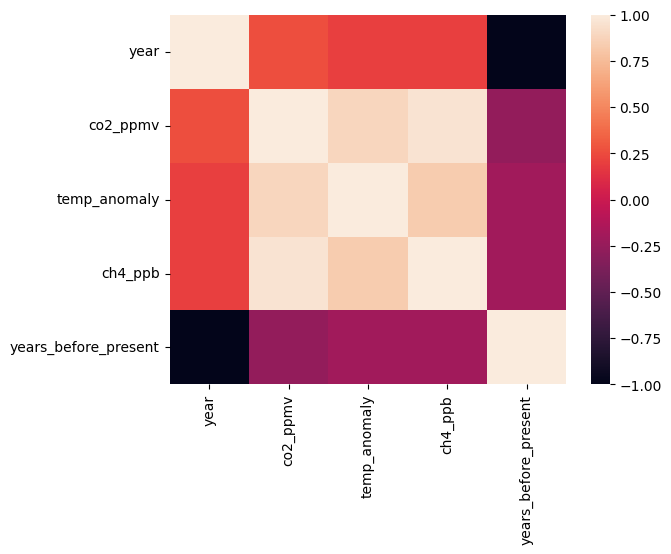

In [281]:
sns.heatmap(fd_corr)

## Analysis <a id="analysis"></a>

### Carbon Dioxide <a id="carbon_dioxide"></a>



A composite of the IPCC data is plotted. This plot demonstrates approximately 800,000 years of co2 data. The composite graph demonstrates how the results from each study have been stitched together to form a cohesive narrative on the fluctuations of  carbon dioxide levels over the last 800,000 years. The plot demonstrates peaks and lows of carbon dioxide approximately every 100,000 years. This aligns with glacial-interglacial cycles occurring every 100,000 years since the Quaternary period (Lisiecki and Raymo, 2005).) During these periods, as polar ice caps melt carbon dioxide is released into the atmosphere thus causing the the rise in atmospheric carbon dioxide.

A rapid rise in carbon dioxide levels during the 21st century is observed. This rise is greater and more rapid tha n can be accounted for by the glacial-interglacial cycle and is attributed to the post industrial revolution large scale usage of fossil fuels.

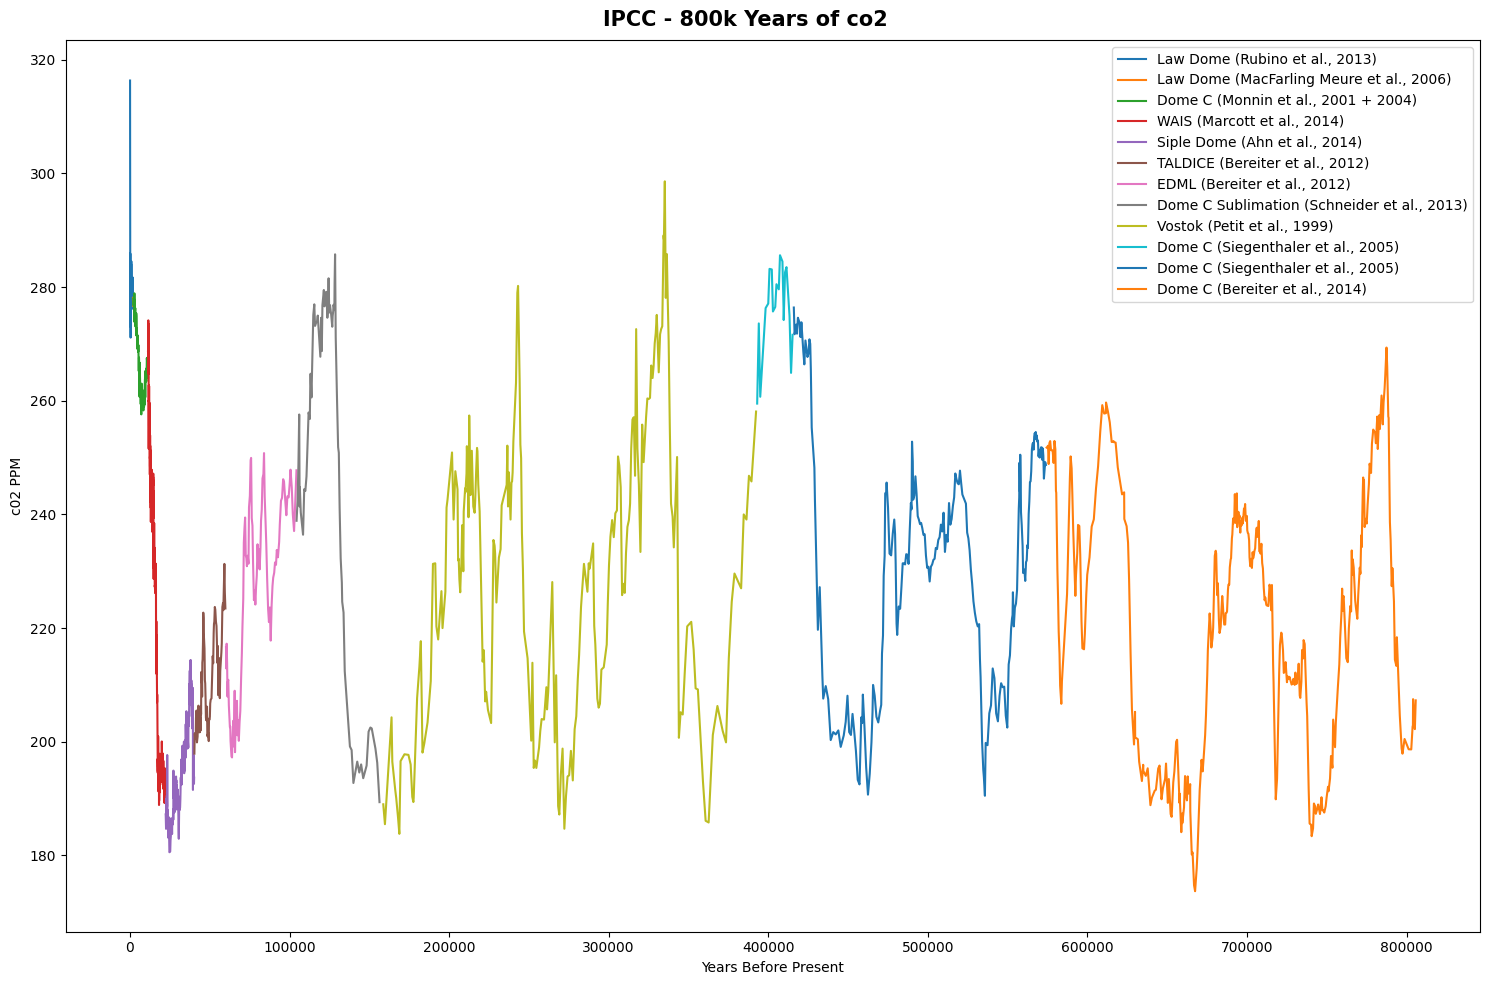

In [282]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

# plot the composite graph with labelling and titles
ax.plot(rubino['years_before_present'], rubino['co2_ppmv'], label='Law Dome (Rubino et al., 2013)')
ax.plot(macfarling['years_before_present'], macfarling['co2_ppmv'], label = 'Law Dome (MacFarling Meure et al., 2006)')
ax.plot(monnin['years_before_present'], monnin['co2_ppmv'], label = 'Dome C (Monnin et al., 2001 + 2004)')
ax.plot(marcott['years_before_present'], marcott['co2_ppmv'], label = 'WAIS (Marcott et al., 2014)')
ax.plot(ahn['years_before_present'], ahn['co2_ppmv'], label = 'Siple Dome (Ahn et al., 2014)')
ax.plot(bereiter['years_before_present'], bereiter['co2_ppmv'], label = 'TALDICE (Bereiter et al., 2012)')
ax.plot(bereiter_2['years_before_present'], bereiter_2['co2_ppmv'], label  = 'EDML (Bereiter et al., 2012)')
ax.plot(schneider['years_before_present'], schneider['co2_ppmv'], label = 'Dome C Sublimation (Schneider et al., 2013)')
ax.plot(petit['years_before_present'], petit['co2_ppmv'], label = 'Vostok (Petit et al., 1999)')
ax.plot(siegenthaler['years_before_present'], siegenthaler['co2_ppmv'], label = 'Dome C (Siegenthaler et al., 2005)')
ax.plot(siegenthaler_2['years_before_present'], siegenthaler_2['co2_ppmv'], label = 'Dome C (Siegenthaler et al., 2005)')
ax.plot(bereiter_3['years_before_present'], bereiter_3['co2_ppmv'], label = 'Dome C (Bereiter et al., 2014)')
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle("IPCC - 800k Years of co2", weight = 'bold', size = 15)
plt.tight_layout()

The composite of the Luthi et al subsets of data is plotted in the same way as the IPCC composite data. An immediate observation is that the data is not as well joined as the data in the IPCC. This is observed at the intersection between Dome C Siegenthaler and Dome C Luthi. The intersections of the subsets of data in the IPCC set are joined less crudely than Luthi. Another noticeable observation is that the large spike in carbon dioxide from the modern era is not observed in Luthi's dataset, most likely as the first data point is in 1813, before the widespread usage of fossil fuels.

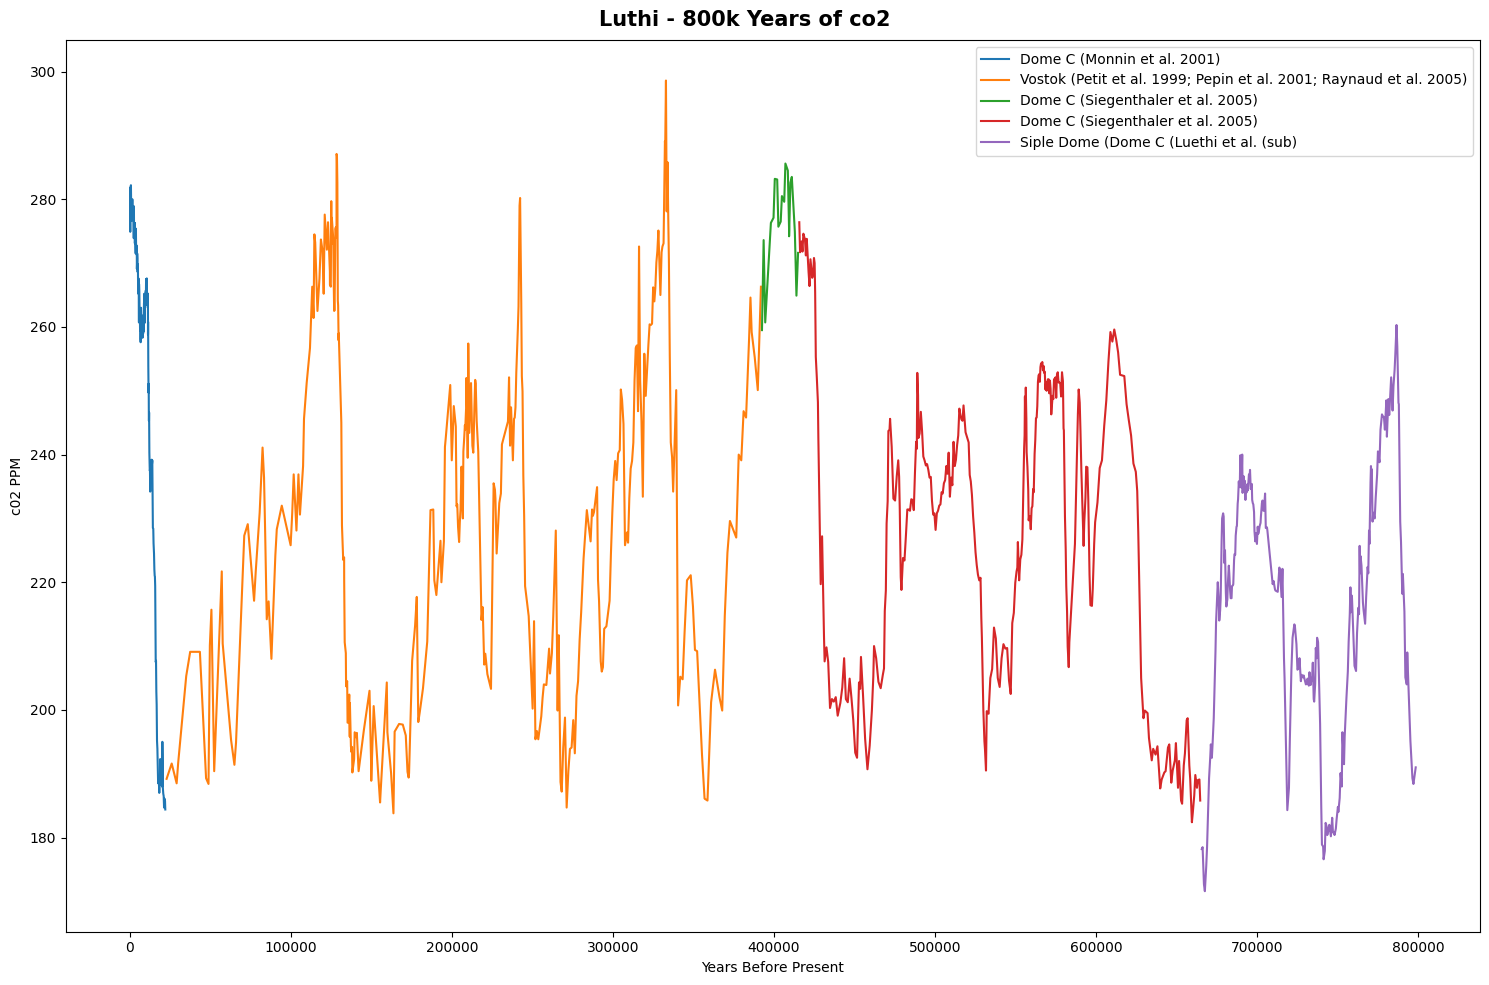

In [283]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

# plot the composite graph with labelling and titles
ax.plot(monnin_luthi['years_before_present'], monnin_luthi['co2_ppmv'], label='Dome C (Monnin et al. 2001)')
ax.plot(pettit_luthi['years_before_present'], pettit_luthi['co2_ppmv'], label = 'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005)')
ax.plot(siegenthaler_1_luthi['years_before_present'], siegenthaler_1_luthi['co2_ppmv'], label = 'Dome C (Siegenthaler et al. 2005)')
ax.plot(siegenthaler_2_luthi['years_before_present'], siegenthaler_2_luthi['co2_ppmv'], label = 'Dome C (Siegenthaler et al. 2005)')
ax.plot(luthi_luthi['years_before_present'], luthi_luthi['co2_ppmv'], label = 'Siple Dome (Dome C (Luethi et al. (sub)')
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle("Luthi - 800k Years of co2", weight = 'bold', size = 15)
plt.tight_layout()

Plotting both carbon dioxide datasets over one another on the same axis allows for a direct comparison.

The most noticeable feature is that the two plots create a blurred appearance as if they are slightly out of phase with one another.

The IPCC data uses the The Antarctic Ice Core Chronology (AICC2012) (Veres et al, 2013) system to age carbon dioxide samples. The data in Luthi dataset uses the EDC3 chronology (Parrenin et al., 2007). The use of two different systems to data the same ice core samples would account for the discrepancy in datapoints that have the same co2 ppm concentration but are slightly out of synchronisation in terms of the time from present when the datapoints fall.

The difference between the two systems is that the AICC2012 timescale has been constructed using the Bayesian tool Datice (Lemieux-Dudon et al., 2010). The Datice tool combines glaciological inputs and data constraints. Whereas the EDC3 timescale is based on the use of a snow accumulation and mechanical flow model and a set a set of independent age markers along the core (Parrenin et al, 2007).

AICC2012 is said to present an improved timing for the last glacial inception and presents a slightly improved timing for the bipolar sequence of events over Marine Isotope Stage 3 (Bazin et al., 2013). Given the see saw nature of glacial-interglacial periods this suggests that the AICC2012 provides a better resolution on the age of samples.

Basin et al (op. cit.) found that the biggest deviation between AICC2012 and EDC occurs around Marine Isotope Stage 12 (MIS 12) approximately 478K years ago. This is not apparent on the plot below. It appears that there is a noticeably bigger deviation between 350,000 - 400,00 years ago.

Some parts of the respective plots cancel each other out (from approximately 600,000-700,00 years ago) suggesting very little disparity between the two chronological systems for samples that fall in that age range.

Apart from the period of approximately 20,00 years ago to 100,000 years ago the trends over time on the two datasets closely match one another. 

It can be said that both datasets are largely in agreement over the trends in atmospheric carbon dioxide over time but that there is disagreement over when these fluctuations occurred.

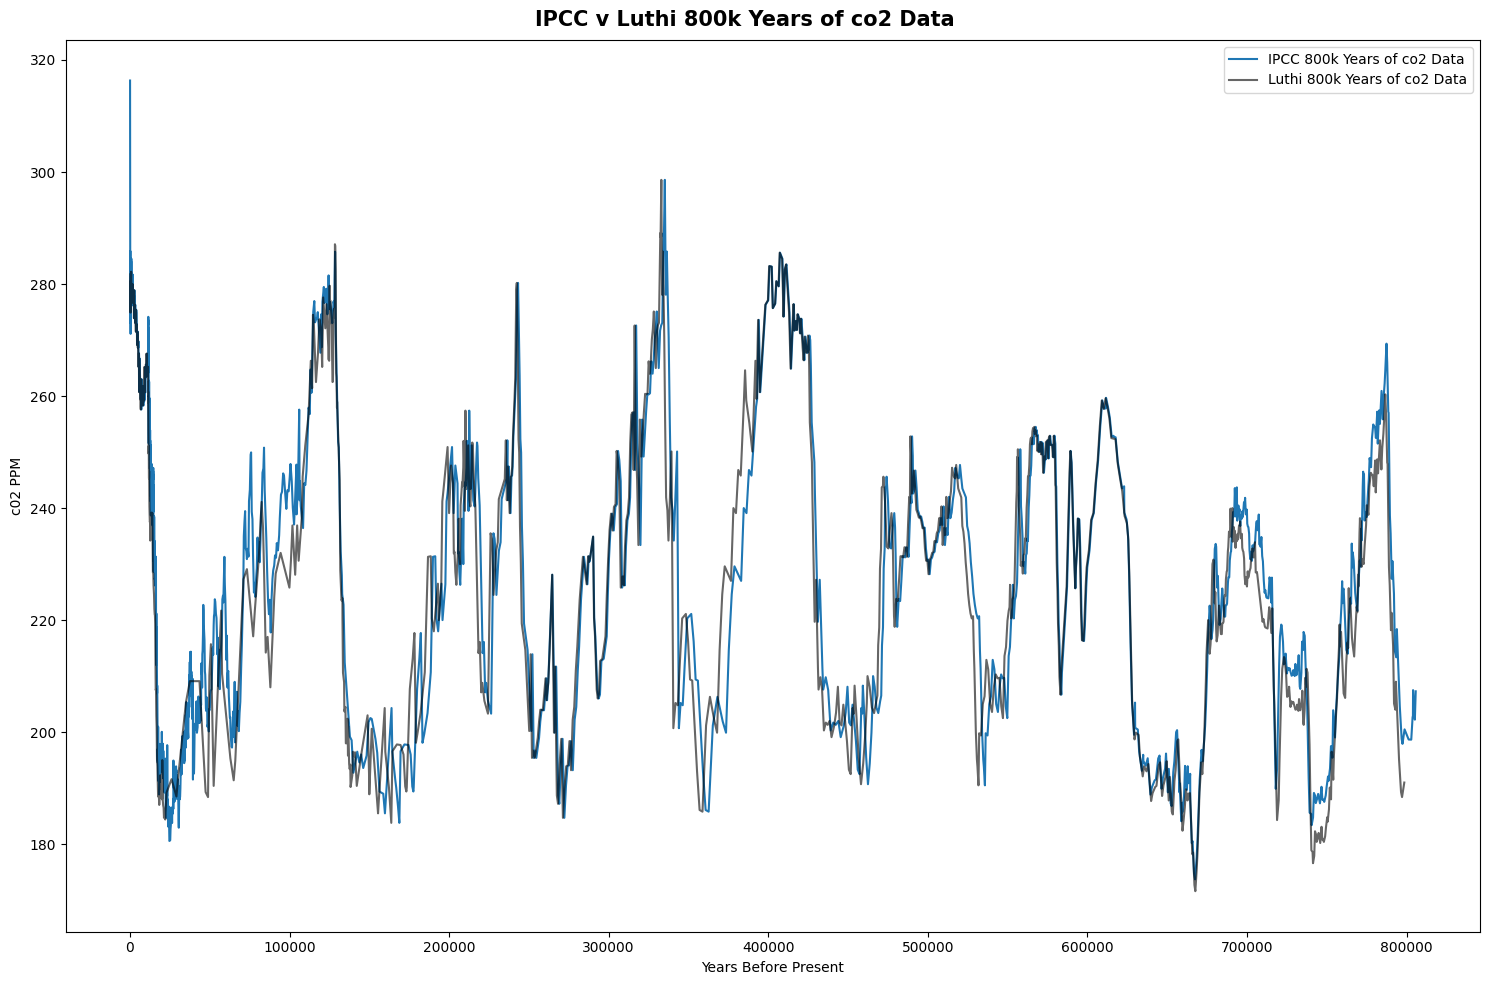

In [284]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(ipcc_full_co2_data['years_before_present'], ipcc_full_co2_data['co2_ppmv'], label = 'IPCC 800k Years of co2 Data')
ax.plot(luthi_full_co2_data['years_before_present'], luthi_full_co2_data['co2_ppmv'], label = 'Luthi 800k Years of co2 Data', color = 'black', alpha = 0.6)
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle('IPCC v Luthi 800k Years of co2 Data', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

Plotting the trend of atmospheric carbon dioxide levels to include data from the last 20 years, from Mauno Loa, visualises the large jump in atmospheric CO2 in the 21st century. It should be noted that the data from Mauno Loa, located in the Pacific is from a different geographical location than that of the Antartic. This may be exaggerating the jump that is seen in the CO2 levels due to the fact that the measurements are drawn different geographic locations.

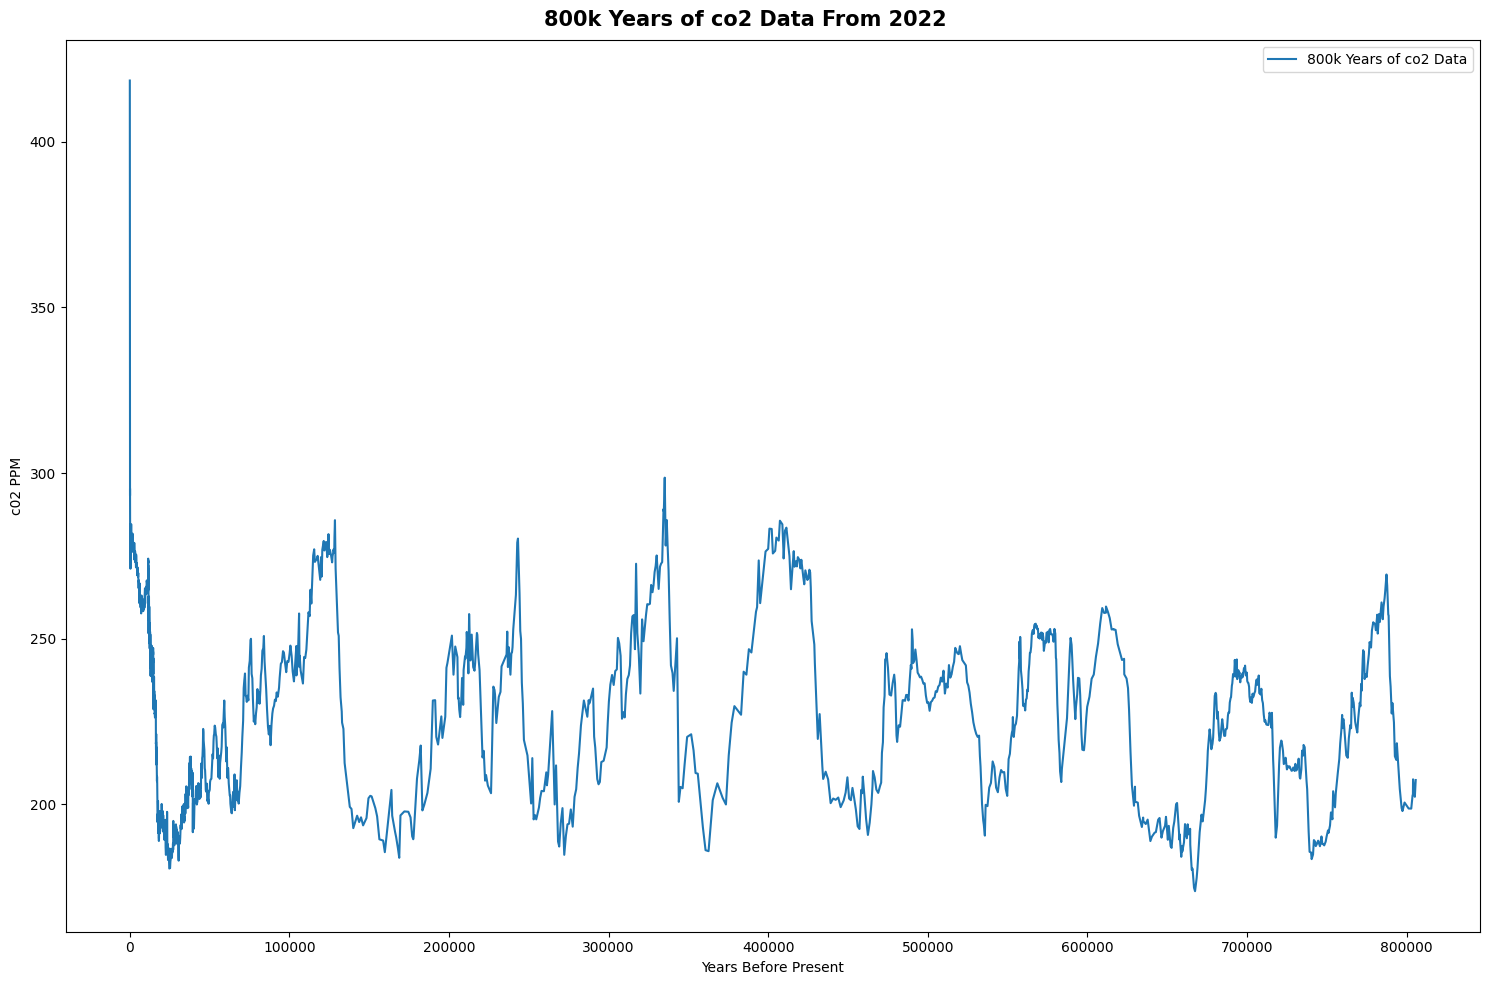

In [285]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(full_co2_data['years_before_present'], full_co2_data['co2_ppmv'], label = '800k Years of co2 Data')
ax.set_xlabel('Years Before Present')
ax.set_ylabel('c02 PPM')
ax.legend()
plt.suptitle('800k Years of co2 Data From 2022', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

Inspecting the frequency distribution (histogram) of the IPCC carbon dioxide data values it can be see that, in the 800,000 year record, atmospheric levels of co2 over 300 ppm occur infrequently. This suggests the spike in atmospheric carbon dioxide occurring in the last 200 years is an an event that falls outside of the cyclical rise and fall of carbon dioxide during glacial-interglacial periods.

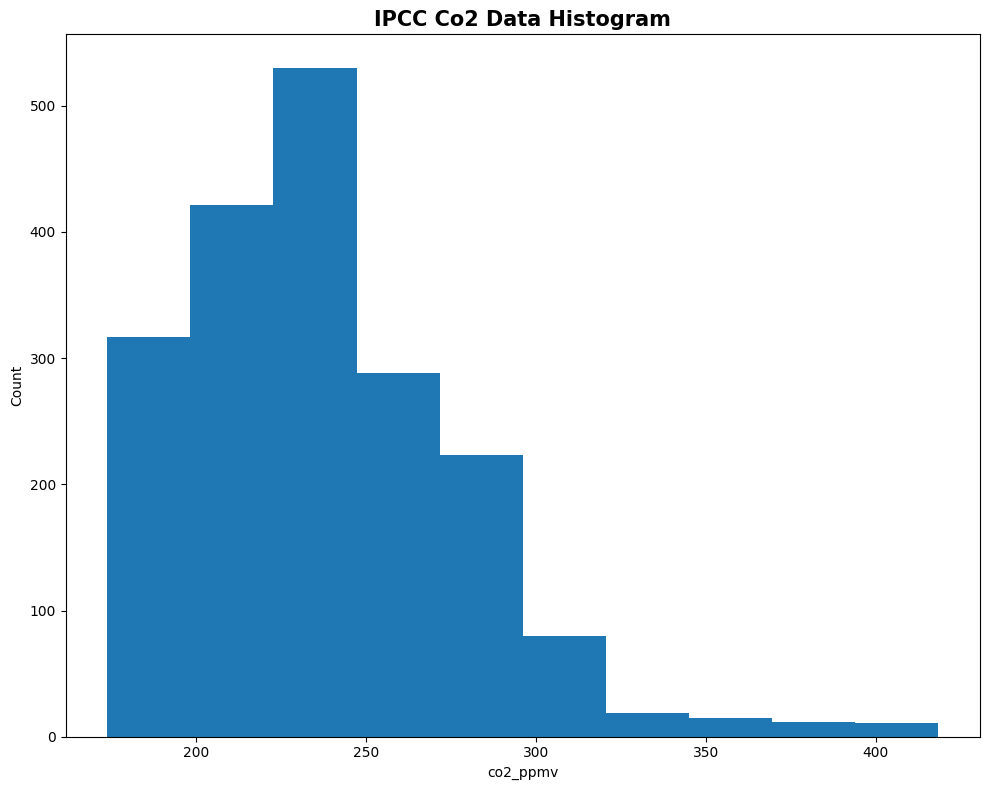

In [286]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(full_co2_data['co2_ppmv'])
ax.set_xlabel('co2_ppmv')
ax.set_ylabel('Count')
ax.set_title('IPCC Co2 Data Histogram', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

Plotting the box plot for the full carbon dioxide dataset it can be seen that carbon dioxide levels above 350 ppmv are outliers and thus are not a normal occurrence. An outlier is described described as an object that deviate significantly from the rest for the objects. This strengthens the hypothesis that the rise in atmospheric CO2 levels in the 21st century is a new phenomenon that is not related to the glacial-interglacial rise and fall of atmospheric carbon dioxide levels.

Text(0.5, 1.0, 'IPCC 800k Years of CO2 Boxplot')

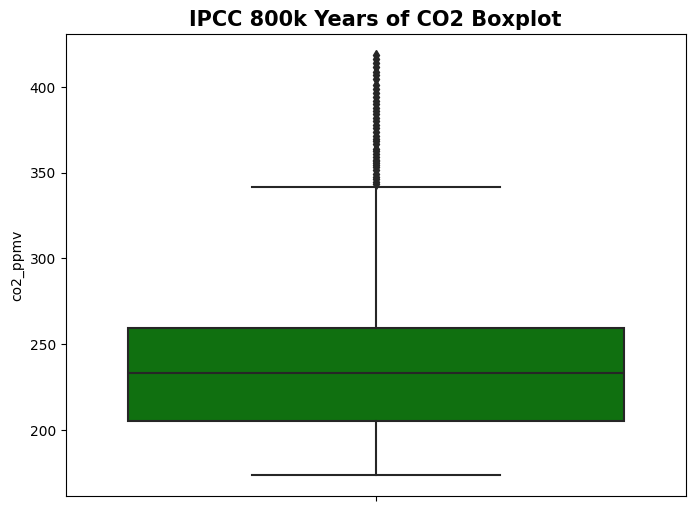

In [287]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'co2_ppmv', data = full_co2_data, color = 'green').set_title('IPCC 800k Years of CO2 Boxplot', weight = 'bold', size = 15)

### Temperature <a id="temperature"></a>

Firstly, the data on which the temperature anomaly was manually calculated for (see [here](#jouzel-2007-temperature-data)) is plotted against the NOAA temperature data . The data that has a manually calculated temperature anomaly is very close to the data sourced from the NOAA, suggesting that the transformation done on that data is close to accurate.

Once again the two datasets appear "out of phase with one another". This effect, explained above, results from the disparities between the AICC2023 and EDC3 chronologies used to date the samples. The two chronologies are in agreement about the rising and falling CO2 levels but disgree on the age of the samples on the dataset.

As the full CO2 data set uses the AICC2023 chronology future analysis on ice core temperature data, in this notebook, will use this chronology so that there is a consistency in comparison of the two variables.

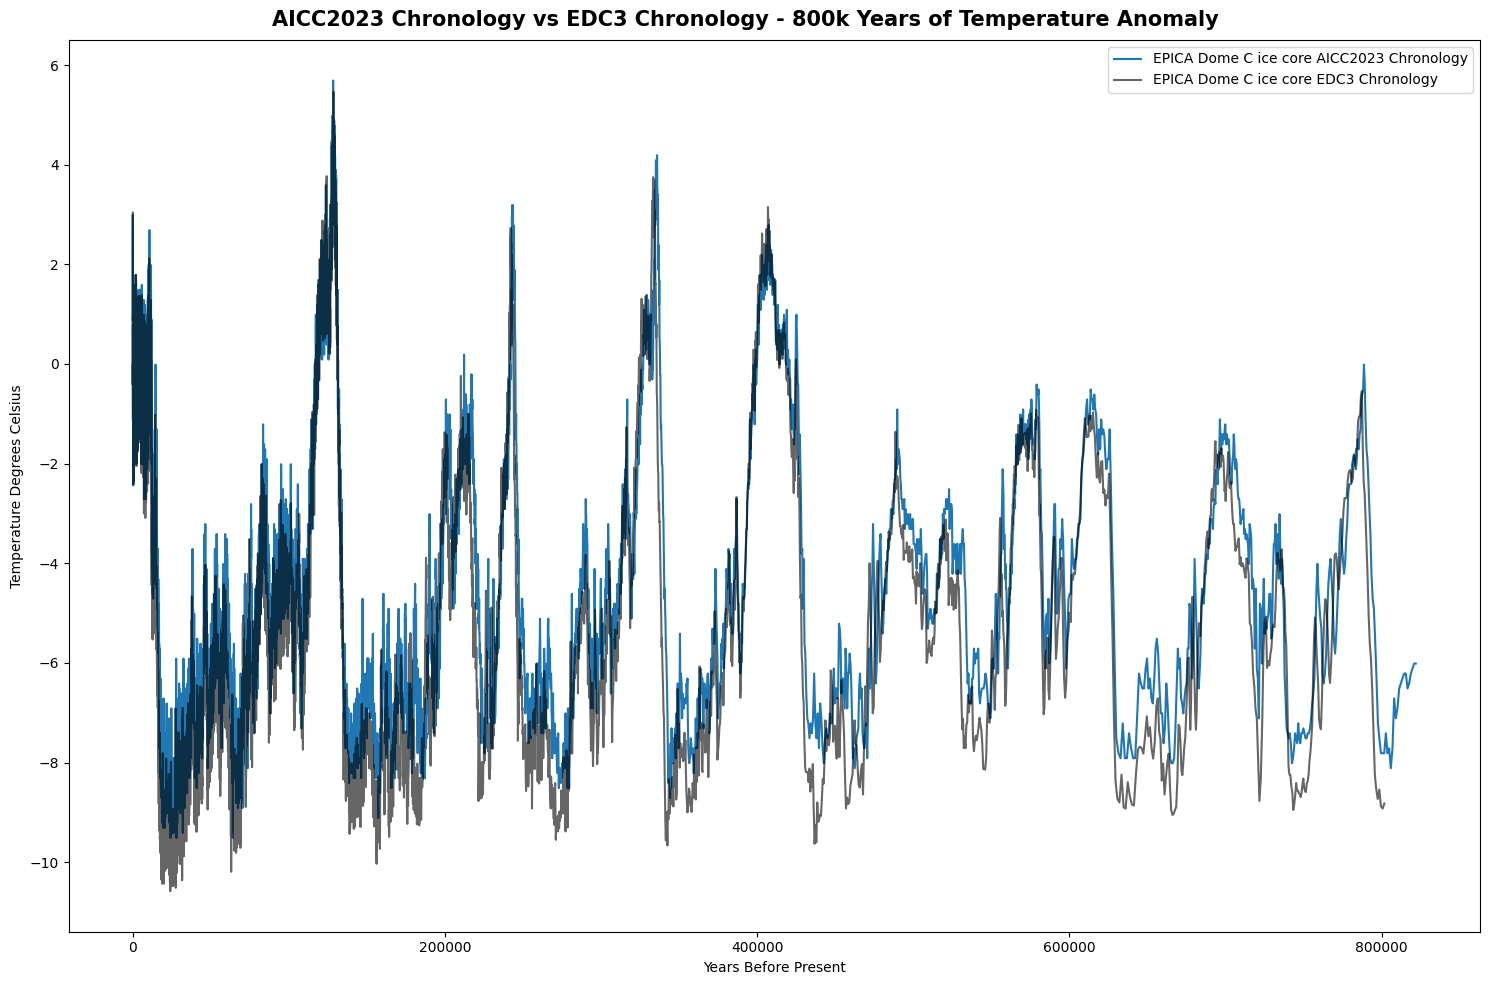

In [288]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15, 10))

# plot the results
ax.plot(jouzel_temp['aicc2012_years_before_present'], jouzel_temp['anomaly'], label = 'EPICA Dome C ice core AICC2023 Chronology')
ax.plot(noaa_temp['years_before_present'], noaa_temp['delta_t_c'], label = 'EPICA Dome C ice core EDC3 Chronology', color = 'black', alpha = 0.6)
ax.set_xlabel('Years Before Present')
ax.set_ylabel('Temperature Degrees Celsius')
ax.legend()
plt.suptitle('AICC2023 Chronology vs EDC3 Chronology - 800k Years of Temperature Anomaly', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

For comparative purposes Jouzel's temperature data (AICC2012 chronology) and the temperature data sourced from [https://www.temperaturerecord.org/#sources](https://www.temperaturerecord.org/#sources) are plotted on the same axis. The data from https://www.temperaturerecord.org/#sources is a global temperature record as opposed to one from a specific location in the case of Jouzel's antartic data.

The first observation from the plots of the data is that the data from https://www.temperaturerecord.org/#sources has been scaled. As [outlined here](#further-temperature-data) this data has been scaled to a four degree range. The unscaled EPICA data has large swings in the in the interglacial periods which visually translates as very dramatic when compared to the global temperature anomaly from the scaled dataset.

The second notable feature on this plot is that trend line of the fluctuating temperature anomaly for both datasets closely matches each other. That is to say the both datasets are in agreement about the rising and falling temperature anomaly over time.

As with the plots of carbon dioxide levels over time, the glacial-interglacial periods are occurring approximately every 100,000 years as seen by the cyclical rise and fall of the temperature anomaly over approximately 100,000 year cycles.

The plots indicates that the earth was hotter just over 100,000 years ago than it is now. This suggests that the current period of global warming is not unprecedented. The plot also indicates that until recently the earth was cooling as part of the glacial-interglacial cycle. That trend has been reversed for some reason and the earth has started to heat outside of what would be expected during this cycle.

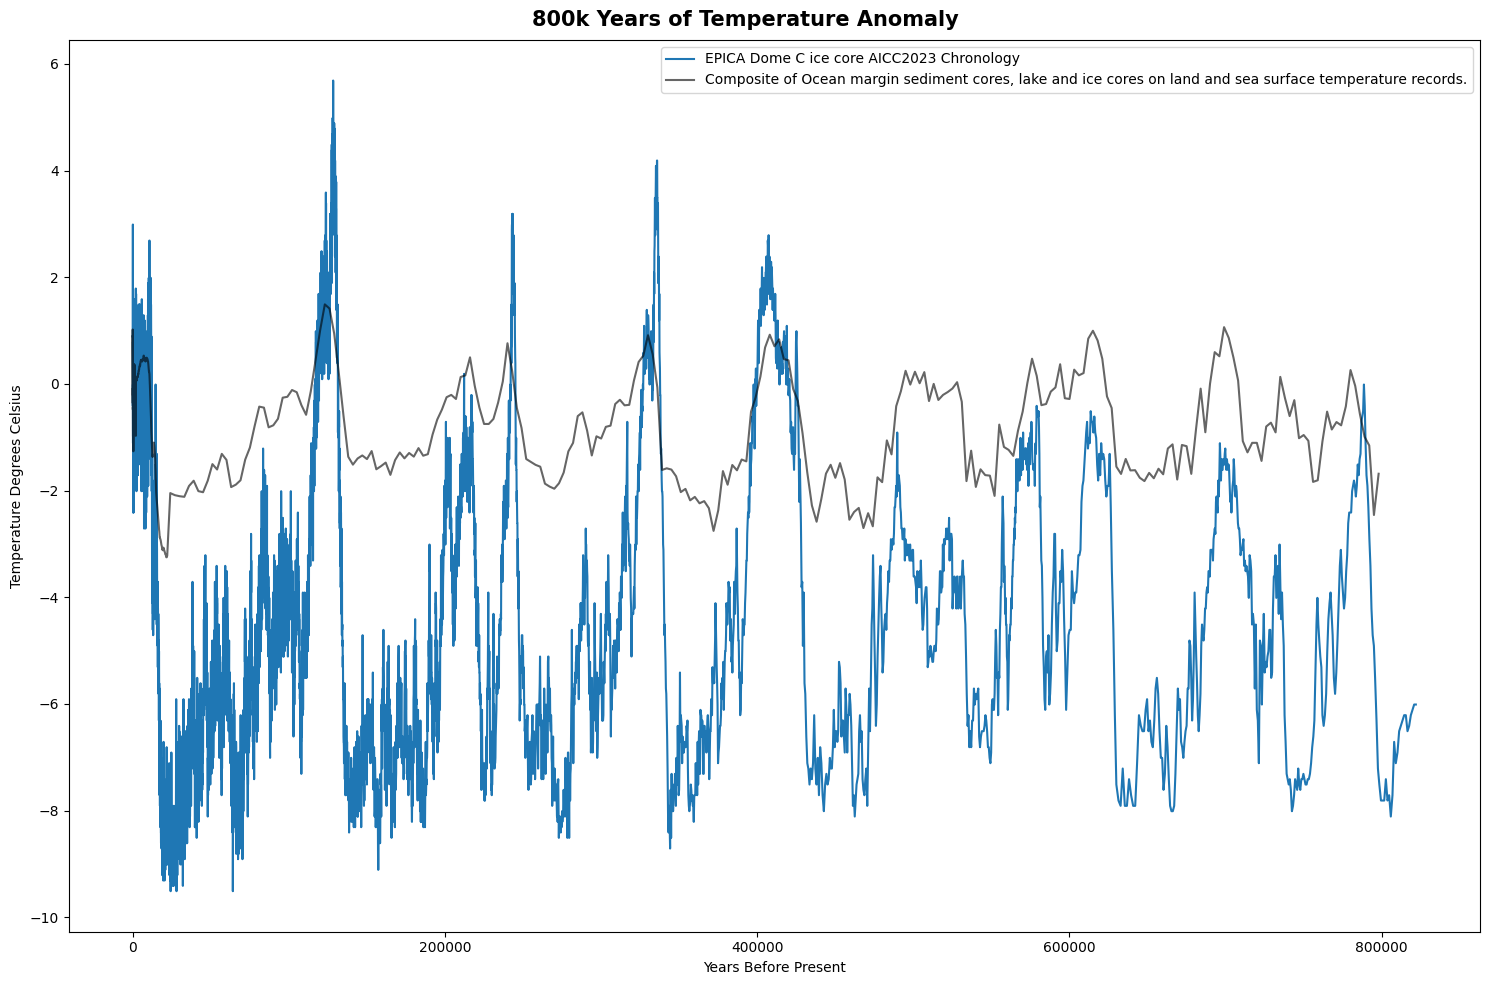

In [289]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15, 10))

# plot the results
ax.plot(jouzel_temp['aicc2012_years_before_present'], jouzel_temp['anomaly'], label = 'EPICA Dome C ice core AICC2023 Chronology')
ax.plot(full_temp_data['years_before_present'], full_temp_data['temp_anomaly'], label =
        'Composite of Ocean margin sediment cores, lake and ice cores on land and sea surface temperature records.', color ='black' , alpha = 0.6)
ax.set_xlabel('Years Before Present')
ax.set_ylabel('Temperature Degrees Celsius')
ax.legend()
plt.suptitle('800k Years of Temperature Anomaly', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Jouzel AICC2012 Chronology 800,000 Years of Antarctic Temperature Anomaly')

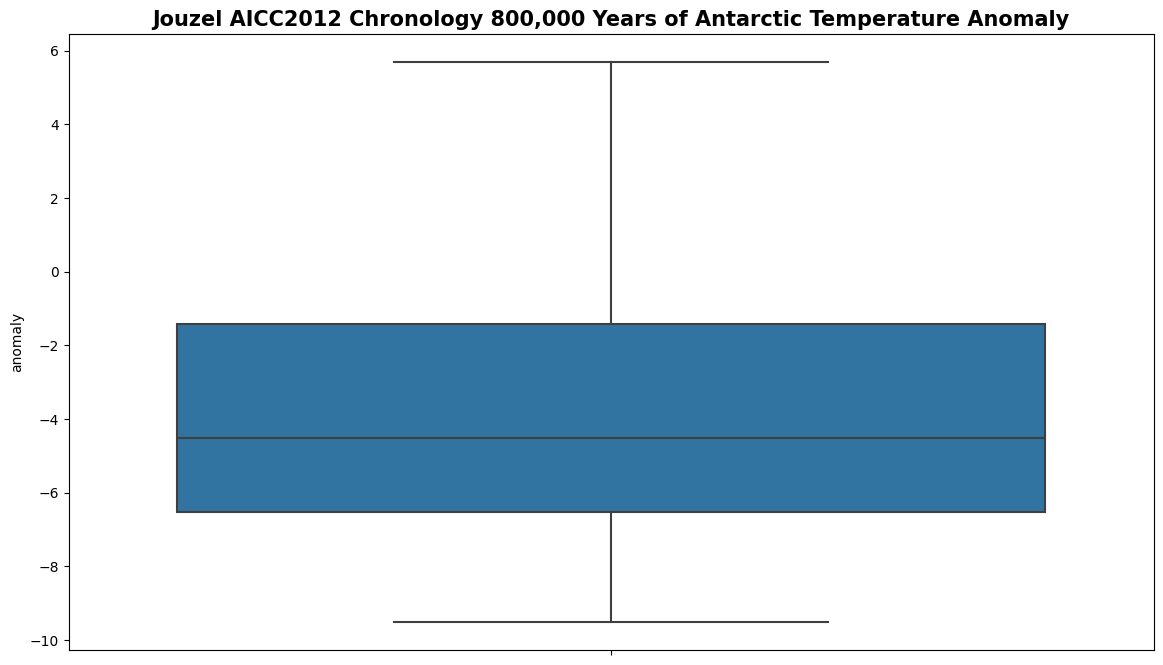

In [290]:
# plot size
plt.figure(figsize=(14, 8))
plt.subplot(1, 1, 1)
sns.boxplot(data = jouzel_temp, y  = 'anomaly').set_title("Jouzel AICC2012 Chronology 800,000 Years of Antarctic Temperature Anomaly", weight = 'bold', size = 15)


### Methane <a id="methane"></a>


Plotting the methane trend for the last 800K years demonstates:

+ that there is a massive spike, in approximately the last 200 -300 years, in the level of atmospheric methane. The large spike in this period begs the question is this spike is real or is it the result of bad quality data or some other underlying cause. To answer this question - *"Over the last two centuries, methane concentrations in the atmosphere have more than doubled, largely due to human-related activities."* (US EPA, 2022).

+ excluding approximately the last 500 years there is a cyclical rise and fall in methane levels that corresponds with glacial - interglacial periods in earths recent history. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


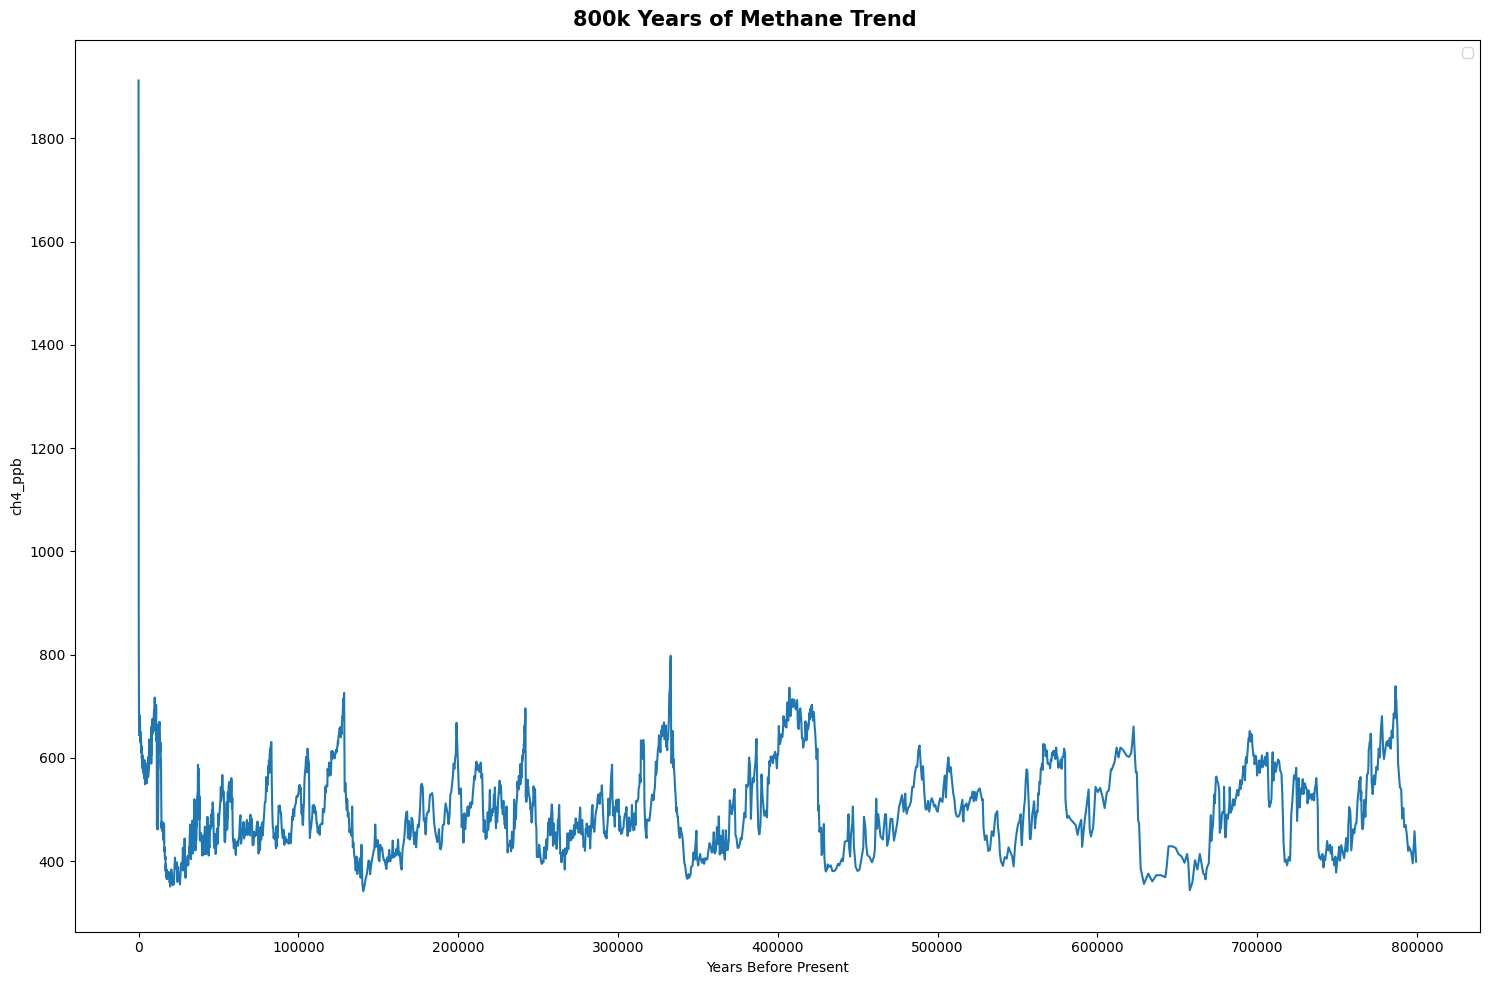

In [291]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15, 10))

# plot the results
ax.plot(full_methane_data['years_before_present'], full_methane_data['ch4_ppb'])

ax.set_xlabel('Years Before Present')
ax.set_ylabel('ch4_ppb')
ax.legend()
plt.suptitle('800k Years of Methane Trend', weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

<Axes: >

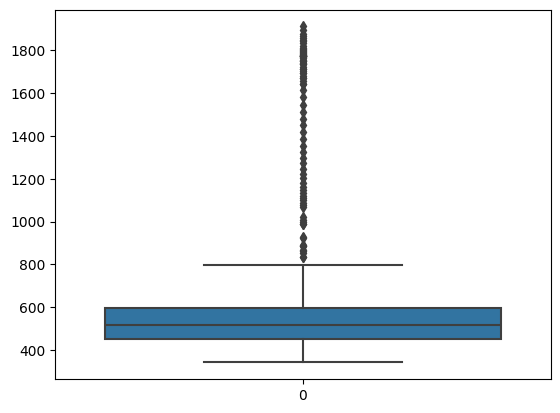

In [292]:
sns.boxplot(full_methane_data['ch4_ppb'])

### Correlation <a id="correlation"></a>

## Irish Context <a id="irish-context"></a>

### Irish Context - Temperature <a id="irish-context---temperature"></a>

A time series plot of the Irish temperature data is plotted. The trend line displays the annual variation in mean temperature year on year. Because of the annual variations in this variable the signal can said to be noisy. Plotting the median annual temperature visualises the years in which fell above or below this value. Of note since 2000 there has been only one year that has had an annual median temperature below the median value suggesting that the years in this period have been warmer than the years to this point.

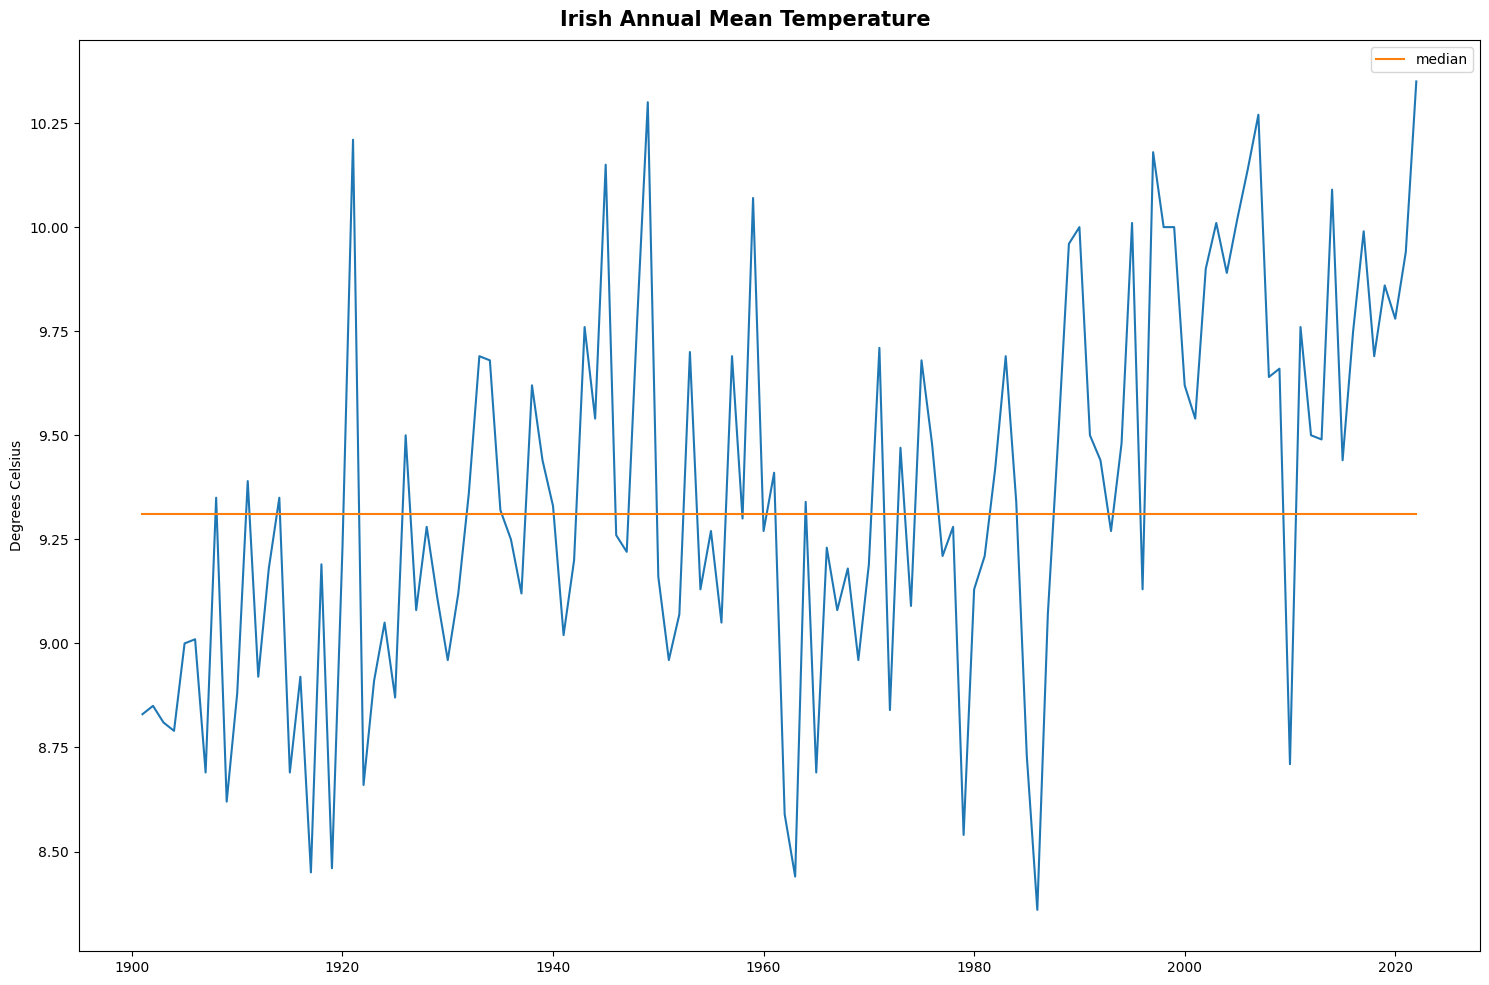

In [293]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

# plot the results
ax.plot(irish_temp_data['annual_mean'])
ax.plot(irish_temp_data['median'], label = 'median')
ax.set_ylabel('Degrees Celsius')
plt.suptitle('Irish Annual Mean Temperature', weight = 'bold', size = 15)
ax.legend()
plt.tight_layout()
plt.show()

The distribution of the mean annual temperature for the last 122 years is plotted. The distribution of data is close to normal. There is a spike in the frequency of datapoints around ten degrees celsius.

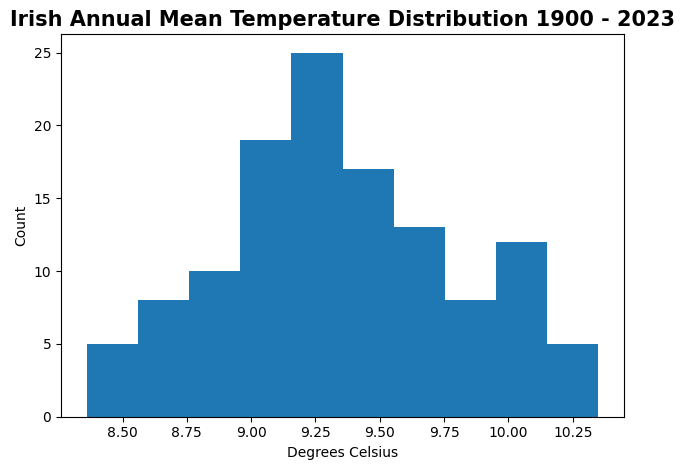

In [294]:
fig, ax =plt.subplots()

ax.hist(irish_temp_data['annual_mean'])
ax.set_xlabel('Degrees Celsius')
ax.set_ylabel('Count')
ax.set_title('Irish Annual Mean Temperature Distribution 1900 - 2023', weight = 'bold', size = 15)
plt.tight_layout()


plt.show()

Using a time stepped linear regression it is possible to plot the relationship between time and the average annual mean temperature. Plotting the regression line smooths the variation in annual mean temperature. The line of regression indicates that over the 120 year period since 1900 there has been an increase in the annual mean temperature of approximately 0.8 of a degree celsius.

In [295]:
irish_temp_data['time'] =  np.arange(len(irish_temp_data.index))

Text(0.5, 1.0, 'Time Plot of Irish Annual Mean Temperature 1900- 2022')

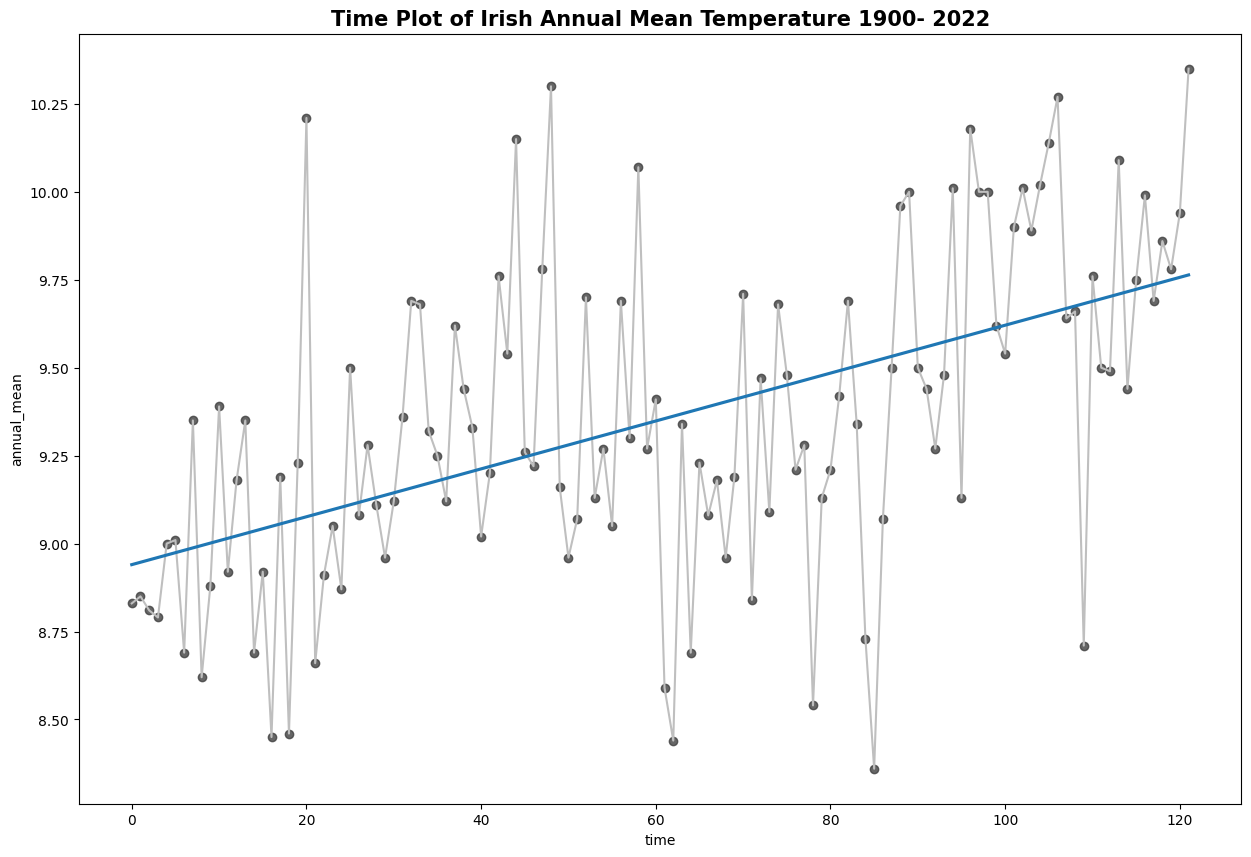

In [296]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot('time', 'annual_mean', data=irish_temp_data, color='0.75')
ax = sns.regplot(x='time', y='annual_mean', data=irish_temp_data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Irish Annual Mean Temperature 1900- 2022', weight = 'bold', size = 15)

Murphy et al. (2023) found that annual mean temperature with warming for the island of Ireland was estimated at 0.88 °C per degree increase in global mean surface temperature. These authors argued that the change in temperature in Ireland has been relatively small and therefore hard to perceive. The increase is more obvious during summer months.

Plotting global temperature anomaly against the Irish annual mean temperature from 1900 to 2022 confirms that both variables are trending in the same direction and that Ireland is getting warmer as the globe temperature increases.

To plot this data the relevant global data is assigned to a DataFrame.

In [297]:
gta = full_temp_data.copy()

The relevant time period is located within the DataFrame.

In [298]:
gta = gta.iloc[0:122]

The data is sortd by ascending year.

In [299]:
gta = gta.sort_values('year', ascending=True)

A time series index is added to the dataset.

In [300]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 21 Dec. 2023]
gta['time_series'] = pd.to_datetime(gta['year'], format='%Y')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 21 Dec. 2023].
gta = gta.set_index('time_series')

A step is added to the DataFrame to match the Irish Temperature Data.

In [301]:
gta['time'] =  np.arange(len(gta.index))

The graph is plotted.

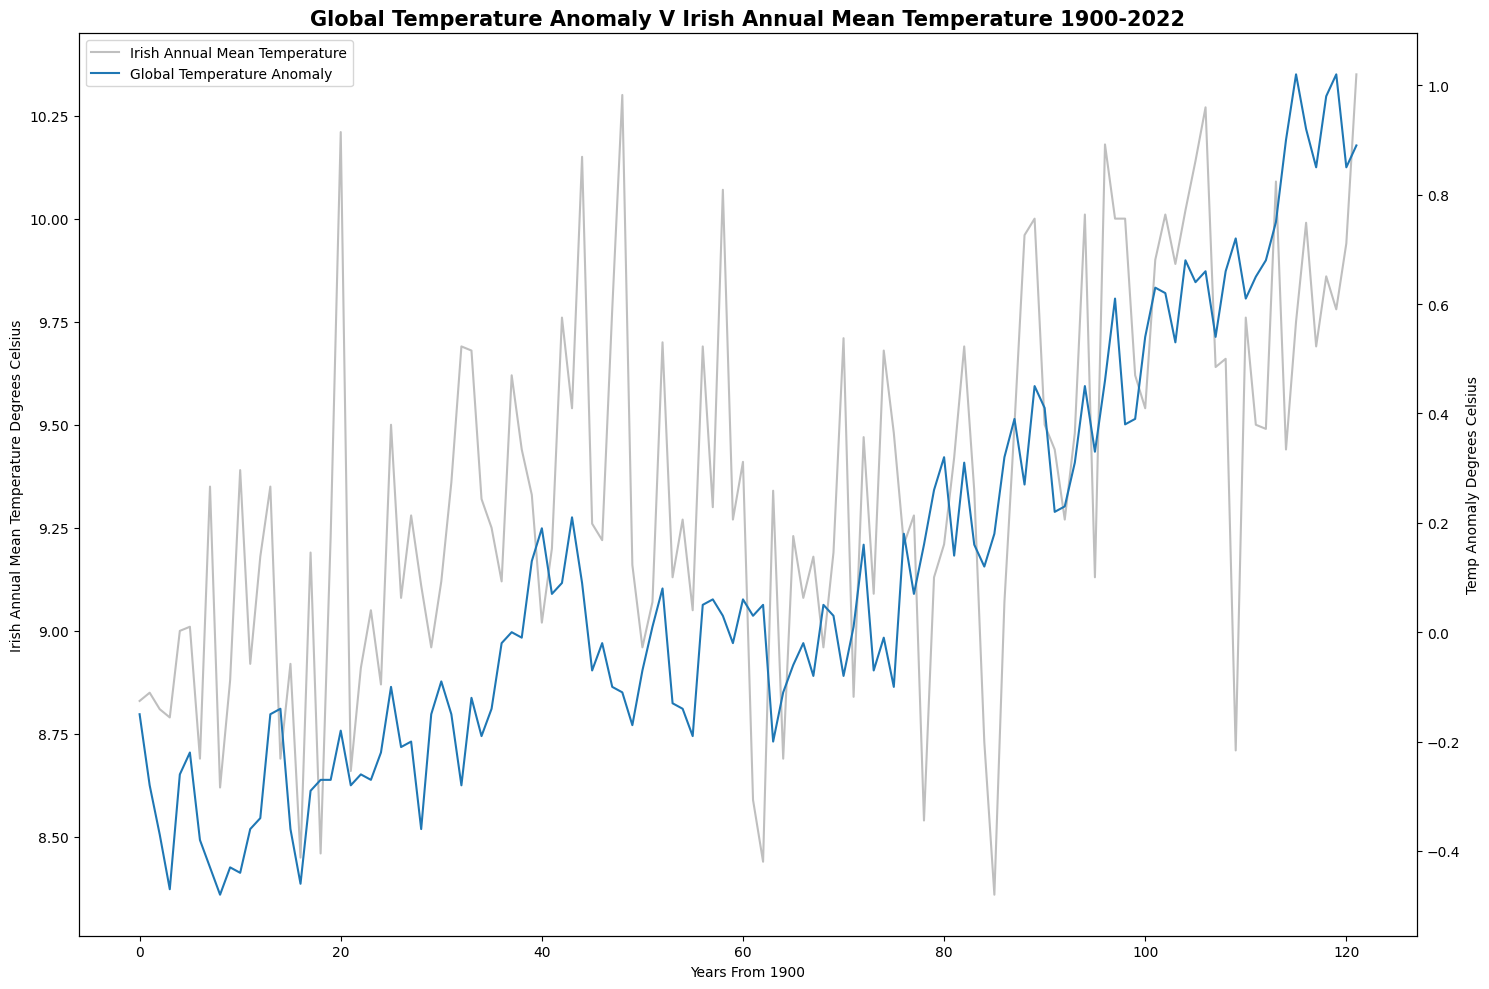

In [302]:
# adapted from code found here - https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend Accessed 21 Dec. 2023

# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

g1 = ax.plot('time', 'annual_mean', data = irish_temp_data, color='0.75', label = 'Irish Annual Mean Temperature')
ax2 = ax.twinx()
g2 = ax2.plot('time', 'temp_anomaly', data = gta, label = 'Global Temperature Anomaly')
ax.set_title('Global Temperature Anomaly V Irish Annual Mean Temperature 1900-2022', weight='bold', size=15)

# display legends
lns = g1+g2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

# add labels
ax.set_xlabel("Years From 1900")
ax.set_ylabel('Irish Annual Mean Temperature Degrees Celsius')
ax2.set_ylabel("Temp Anomaly Degrees Celsius")

#plt.suptitle('Global Temperature Anomaly V Irish Annual Mean Temperature 1900-2022 ', weight='bold', size=15)
plt.tight_layout()

The two variables can be tested to understand if there is a lag between them. In this case the *y variable*, the mean annual Irish temperature, lags the *x variable* by 0. This indicates that the rise in temperature in Ireland happens at the same time as the rise in the global temperature anomaly.

In [303]:
# Adapted code from - https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation Accessed 21 Dec. 2023
x = gta['temp_anomaly']
y = irish_temp_data['annual_mean']
correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

In [304]:
print(lag)

0


The data analysed above is annual data. Weather variables are subject to seasonal variation. For example, Harmel et al. (2002) and Ruff and Neelin (2012) provide evidence that the distribution of daily temperature data is skewed and that the skewness depends on the season. Temperature for each of the seasons can be anlaysed over time to test the assumption that temperature increases are hard to perceive and seasonal. The data analysed in this section examines data from the Dublin airport weather station. It is recognised that this weather data is from one location and differs from the all Ireland data used by Murphy et al (2023). However, this data can act as a a proxy for national data.

As per Wikipedia (Wikipedia Contributors, 2023), Ireland experiences 4 seasons:

- Winter = November, December & January
- Spring = February, March & April
- Summer = May, June & July
- Autumn = August, September & October

These are the definitions of season that are used in the following section.

Plotting boxplots of the Irish monthly temperature in Dublin Airport demonstrates how the median temperature changes month by month.

Text(0.5, 1.0, 'Monthly Mean Temperature Variation Dublin Airport 1941-2023')

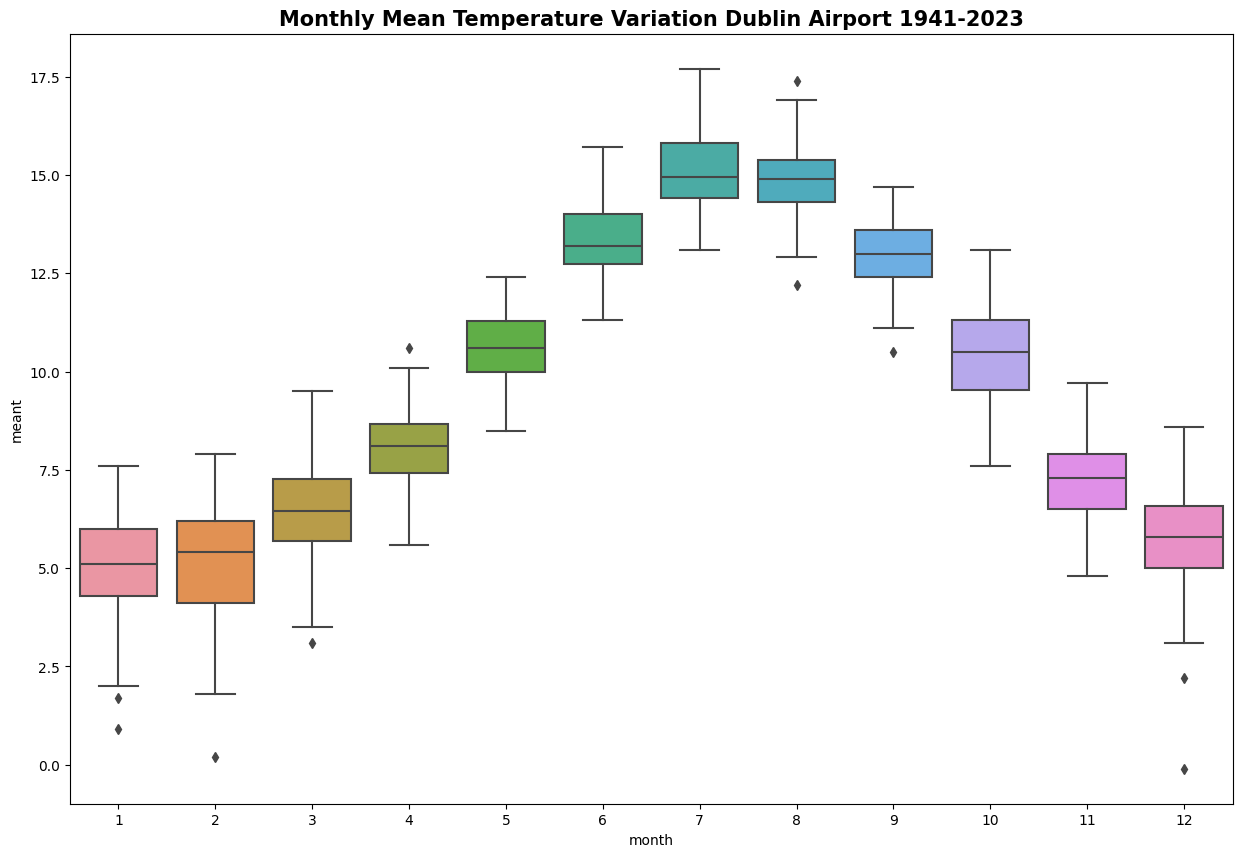

In [305]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15, 10))

# plot the boxplots
sns.boxplot(x='month', y='meant', data =da_monthly_weather_data).set_title('Monthly Mean Temperature Variation Dublin Airport 1941-2023', weight='bold', size=15)

Season specific DataFrames of monthly weather data from Dublin airport are assigned.

In [306]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
spring = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
summer = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
autumn = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)

Plotting the data points without smoothing will result in a plot that is difficult to interpret due to the monthly variation in mean temperature values. Thge type of smoothin applied is moving average smoothing. This type of smoothing is a common type of smoothing used in time series analysis.

In [307]:
# code adapted from https://medium.com/@srv96/smoothing-techniques-for-time-series-data-91cccfd008a2 Accessed 21 Dec. 2023
def moving_avarage_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t] = np.mean(X[:t+1])
		else:
			S[t] = np.sum(X[t-k:t])/k
	return S

The plot demonstrates that in spring in winter the mean monthly temperatures have been consistent since 1942 without any obvious dramatic upward trend. Summer and Autumn have been gradually getting warmer. Taking this into account it is consistent with Murphy et al. (2023) in so far as the gradual increase in temperature is relatively small and confined to summer and autumn months. There could be a perception that winter feels colder however the data suggests that the temperature that over the last 80 years there is little variation in the mean monthly temperature.

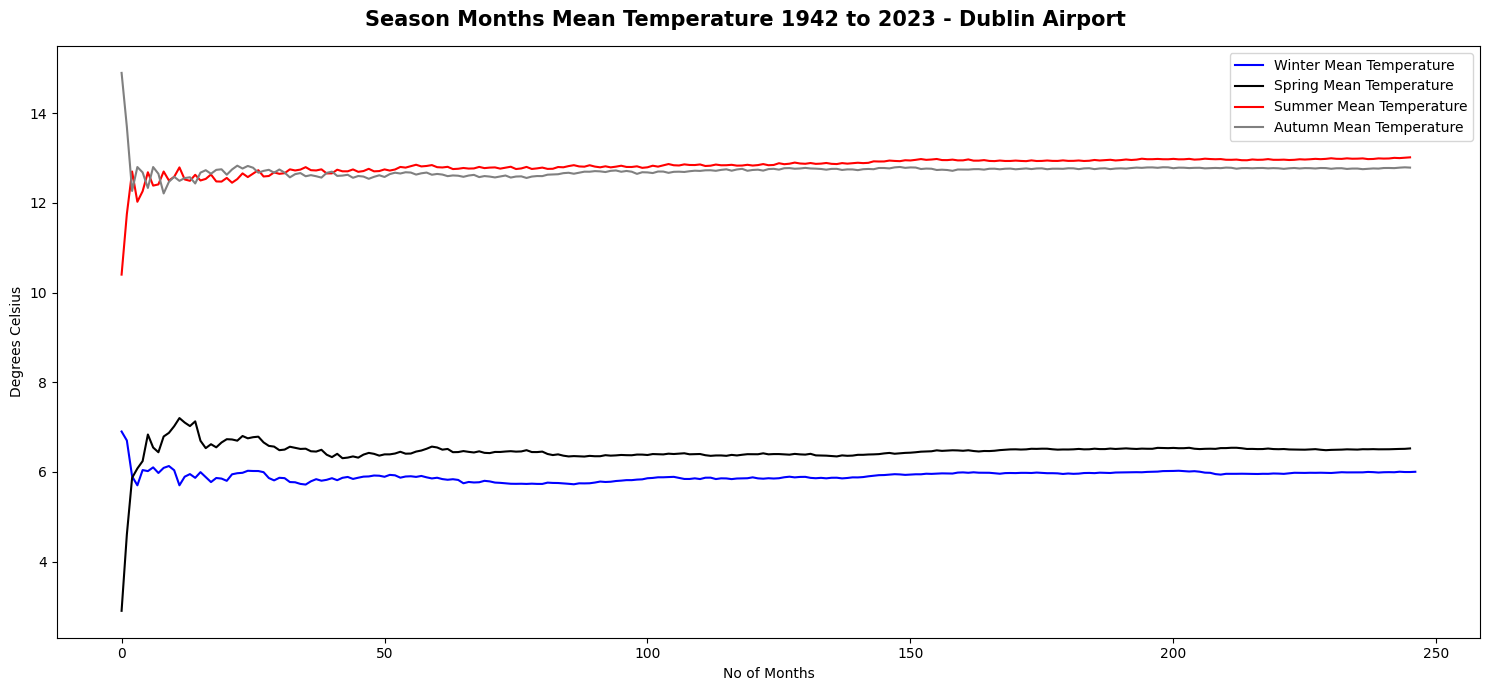

In [308]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(moving_avarage_smoothing(winter['meant'], 250), label = 'Winter Mean Temperature', color = 'blue')
ax.plot(moving_avarage_smoothing(spring['meant'], 250), label = 'Spring Mean Temperature', color = 'black')
ax.plot(moving_avarage_smoothing(summer['meant'], 250), label = 'Summer Mean Temperature', color = 'red')
ax.plot(moving_avarage_smoothing(autumn['meant'], 250), label = 'Autumn Mean Temperature', color = 'grey')
ax.set_xlabel("No of Months")
ax.set_ylabel('Degrees Celsius')
ax.legend()
plt.suptitle('Season Months Mean Temperature 1942 to 2023 - Dublin Airport', weight='bold', size=15)
plt.tight_layout()



### Irish Context - Precipitation <a id="irish-context---precipitation"></a>

In [309]:
irish_precip_data

,year,annual_mean,5_yr_smooth
time_series,,,
1901-01-01,1901,1071.26,1131.46
1902-01-01,1902,1017.68,1112.63
1903-01-01,1903,1370.80,1095.09
1904-01-01,1904,1085.16,1080.07
1905-01-01,1905,960.97,1068.96
...,...,...,...
2018-01-01,2018,1209.96,1241.65
2019-01-01,2019,1293.03,1232.12
2020-01-01,2020,1355.80,1220.08


A column is added to calculate the median value of the annual mean precipitation.

In [310]:
irish_precip_data['median'] = irish_precip_data['annual_mean'].median()

Annual mean precipitation time series data is plotted. The normal annual variation in precipitation is visualised. It is difficult to discern any trend or pattern in this plot as the signal varies year on year.

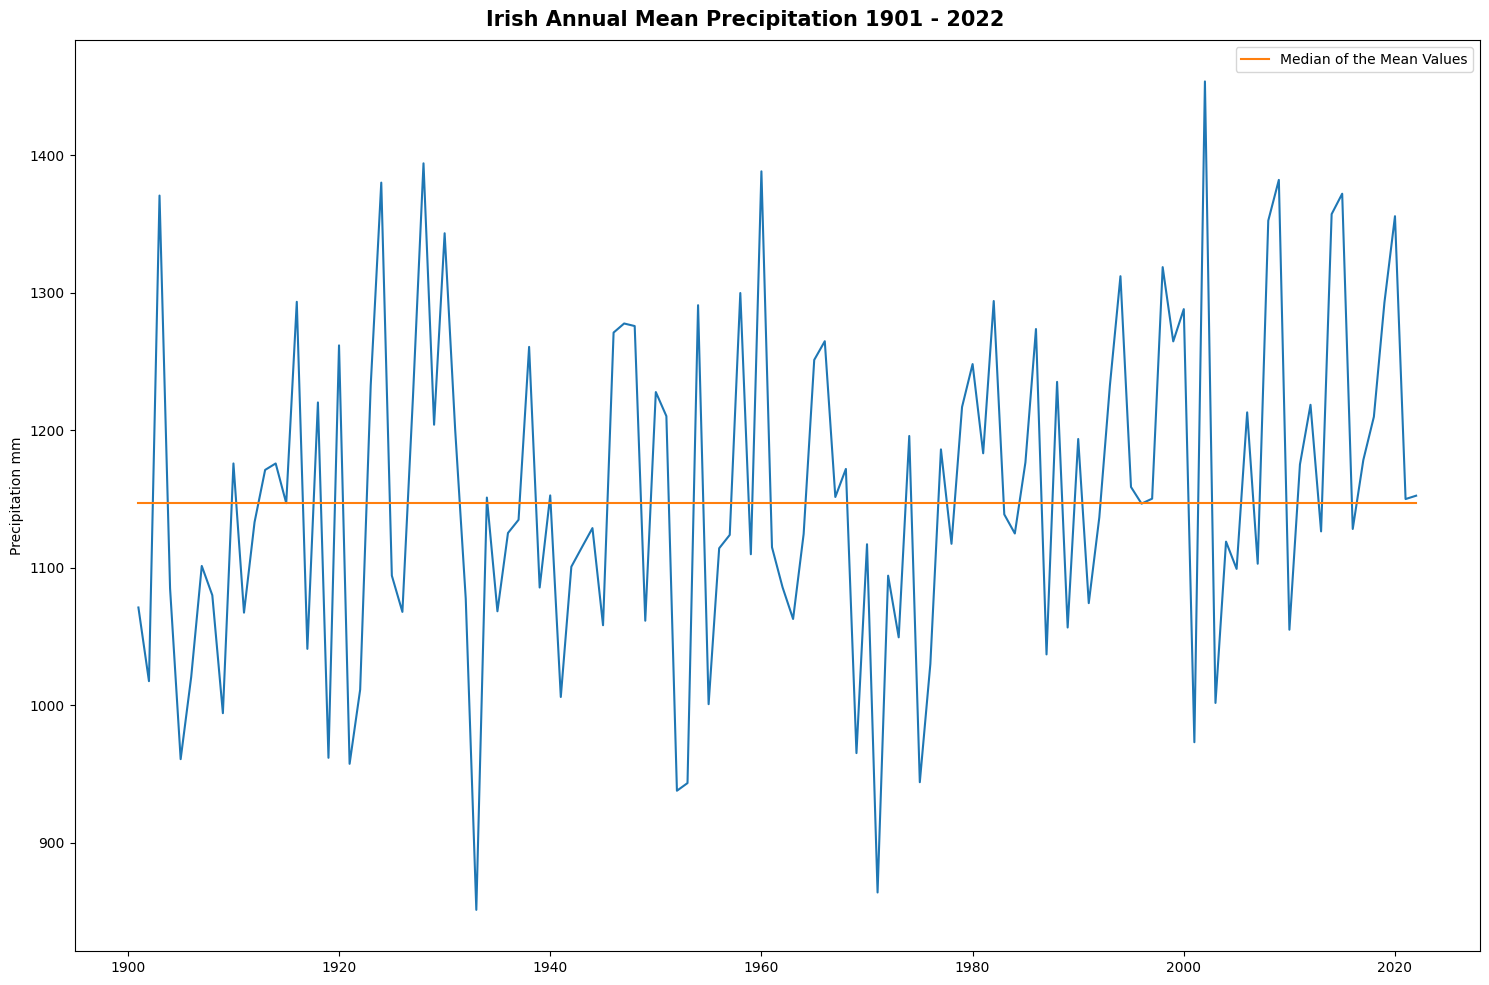

In [311]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15,10))

# plot the results
ax.plot(irish_precip_data['annual_mean'])
ax.plot(irish_precip_data['median'], label = 'Median of the Mean Values')
ax.set_ylabel('Precipitation mm')
plt.suptitle('Irish Annual Mean Precipitation 1901 - 2022', weight = 'bold', size = 15)
ax.legend()
plt.tight_layout()
plt.show()

Plotting the linear regression line allows resolution of the trend in annual mean precipitation.

A time step is added to the dataset to visualise the linear regression.

In [312]:
irish_precip_data['time'] =  np.arange(len(irish_precip_data.index))

On the regression plot, the line of regression indicates that since 1900 the annual mean precipitation is increasing by aprroximately 0.8mm per year. This is a small amount but translates to a 100mm difference over the 123 year period. The gradual increase is so small it is imperceptible, however it is clear that the Irish climate has become wetter over the last 123 years.

Text(0.5, 1.0, 'Time Plot of Irish Annual Mean Precipitation 1900 - 2022')

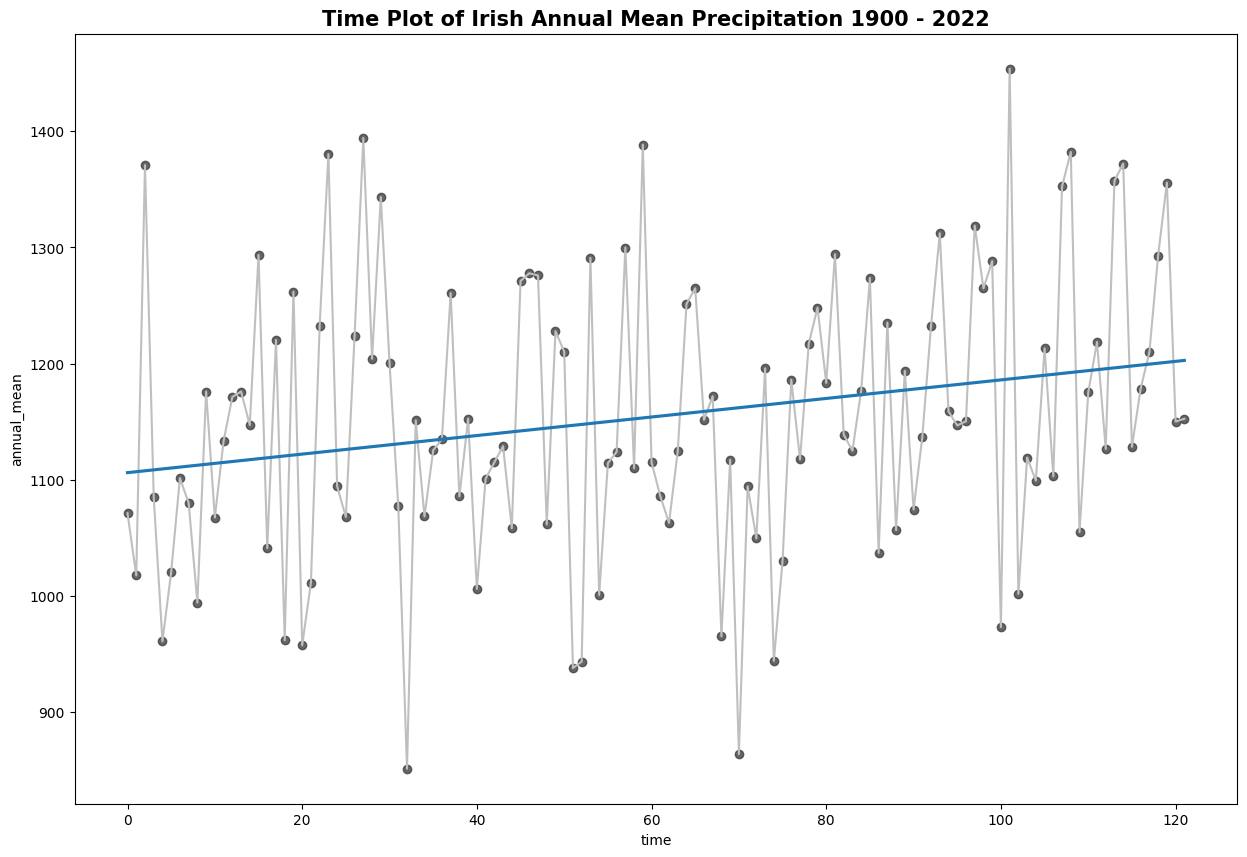

In [313]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot('time', 'annual_mean', data=irish_precip_data, color='0.75')
ax = sns.regplot(x='time', y='annual_mean', data=irish_precip_data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Irish Annual Mean Precipitation 1900 - 2022', weight = 'bold', size = 15)

An insight into the monthly variation on precipitation is gained by plotting boxplots of historical monthly data. The boxplots demonstrate that winter and autumn tend to be wetter than spring and summer.

Text(0.5, 1.0, 'Monthly Mean Precipitation 1711-2016')

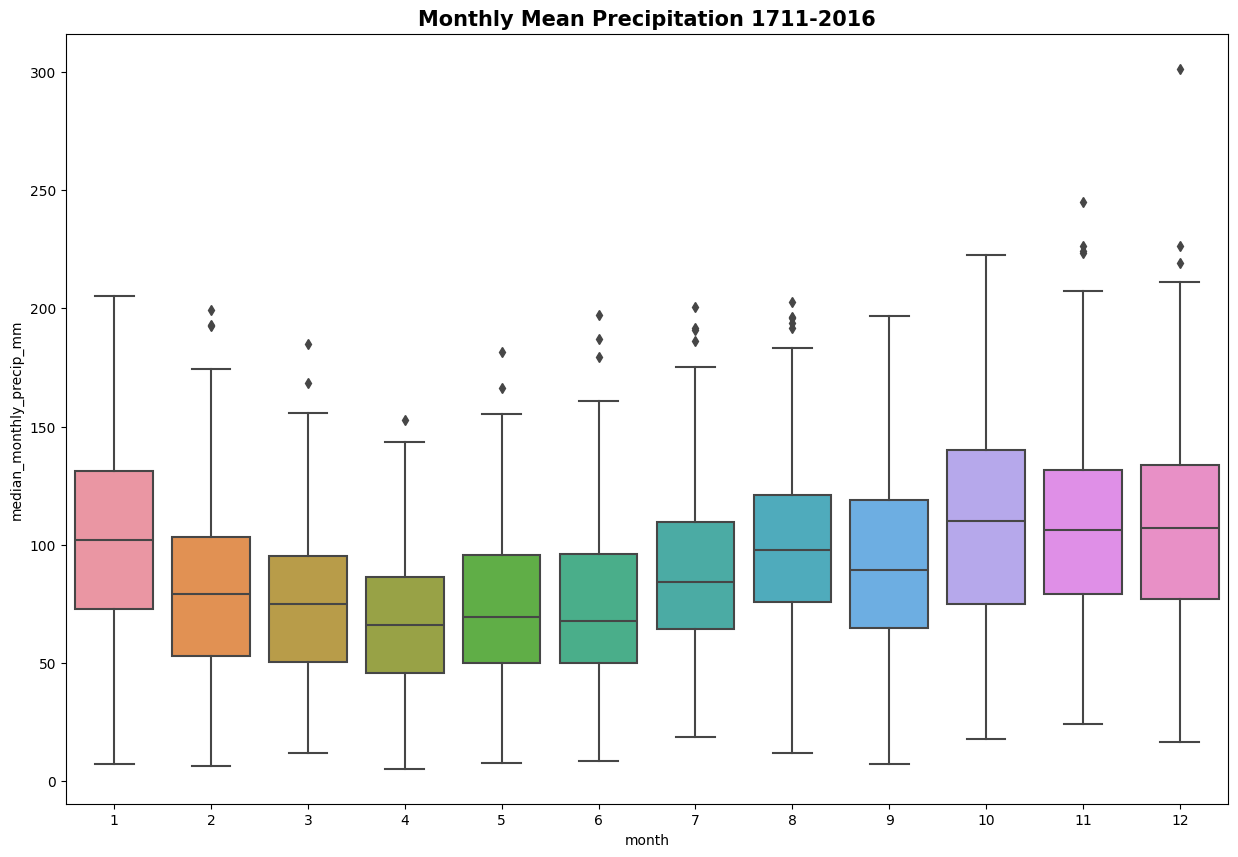

In [314]:
# create an empty plot
fig, ax = plt.subplots(figsize=(15, 10))

# plot the boxplots
sns.boxplot(x='month', y='median_monthly_precip_mm', data =irish_monthly_precip_data).set_title('Monthly Mean Precipitation 1711-2016', weight='bold', size=15)

The trend in seasonal precipitation gives an indication if changes are more pronounced in one season over another or if the change is spread evenly across all seasons.

To plot seasonal trend subsets of seasonal precipitation data are assigned.

In [315]:
winter = irish_monthly_precip_data[irish_monthly_precip_data.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
spring = irish_monthly_precip_data[irish_monthly_precip_data.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
summer = irish_monthly_precip_data[irish_monthly_precip_data.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
autumn = irish_monthly_precip_data[irish_monthly_precip_data.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)

The seasonal trends are plotted with smoothing applied to the seasonal series to make the signal more readable. The trend clearly demonstrates from approximately halfway through the time period that is included in the data, winter months have become wetter in Ireland as highlighted by the gradual increase in the slope of the blue line below.

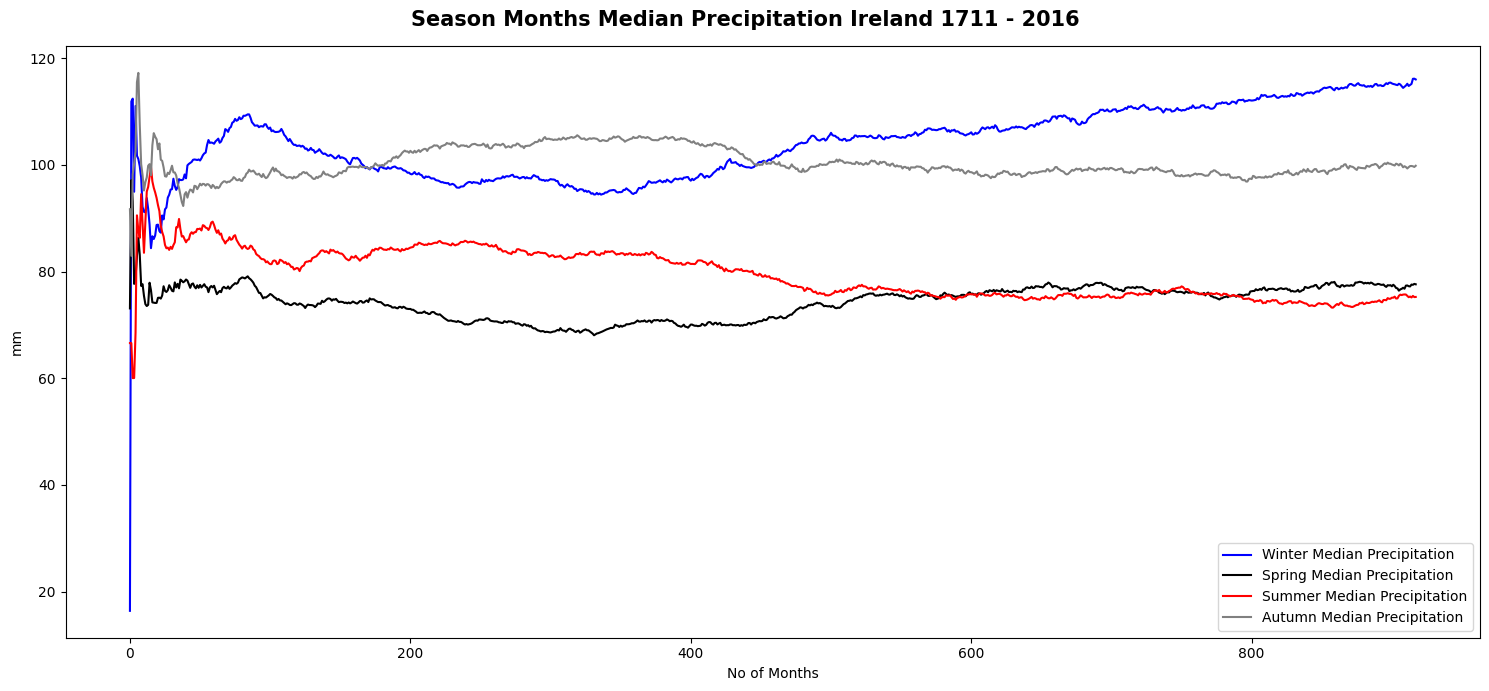

In [316]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(moving_avarage_smoothing(winter['median_monthly_precip_mm'], 250), label = 'Winter Median Precipitation', color = 'blue')
ax.plot(moving_avarage_smoothing(spring['median_monthly_precip_mm'], 250), label = 'Spring Median Precipitation', color = 'black')
ax.plot(moving_avarage_smoothing(summer['median_monthly_precip_mm'], 250), label = 'Summer Median Precipitation', color = 'red')
ax.plot(moving_avarage_smoothing(autumn['median_monthly_precip_mm'], 250), label = 'Autumn Median Precipitation', color = 'grey')
ax.set_xlabel("No of Months")
ax.set_ylabel('mm')
ax.legend()
plt.suptitle('Season Months Median Precipitation Ireland 1711 - 2016', weight='bold', size=15)
plt.tight_layout()

This can be compared with local preciptation from Dublin airport, albeit during a more condensed time frame. It is also worth noting that that national data is using the median monthly precipitation value while local data (from Dublin airport) uses the amount of precipitation.

A time step is added to the monthly precipitation data from Dublin airport.

In [317]:
da_monthly_weather_data['time'] =  np.arange(len(da_monthly_weather_data))

The monthly trend and regression line are plotted. The regression line demonstrates a very shallow slope that indicates that during the period bertween 1941 and 2023 there has been a very small increase in precipitation.

Text(0.5, 1.0, 'Dublin Airport Monthly Rainfall Data 1941 - 2023')

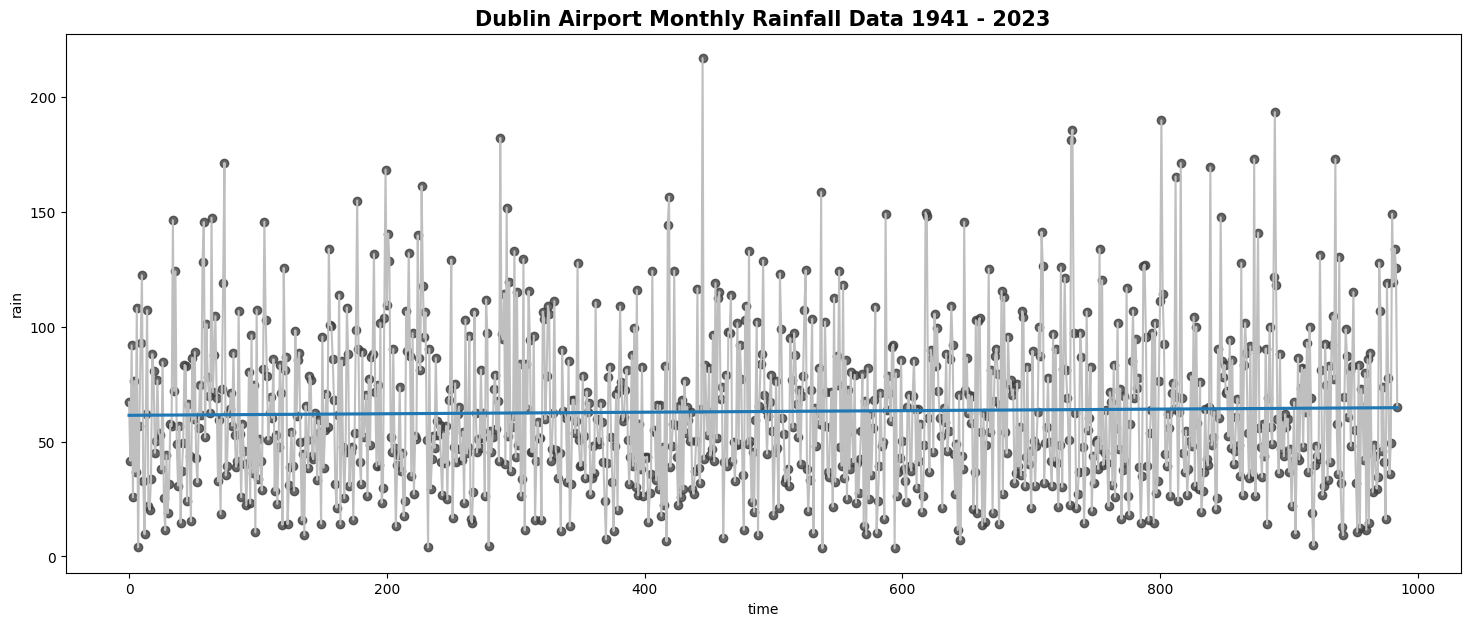

In [318]:
fig, ax = plt.subplots(figsize=(18,7))

ax.plot('time', 'rain', data=da_monthly_weather_data, color='0.75')
ax = sns.regplot(x='time', y='rain', data=da_monthly_weather_data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Dublin Airport Monthly Rainfall Data 1941 - 2023', weight = 'bold', size = 15)

Seasonal subsets of Dublin Airport precipitation data are created. This allows a plot of the variation in seasonal months precipitation that can be compared to national seasonal variation in precipitation.

In [319]:
winter = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
spring = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
summer = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
autumn = da_monthly_weather_data[da_monthly_weather_data.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)

No discernible trend is obvious in seasonal variation from Dublin Airport which supports the hypothesis that in ths location there has been little to no increase annual precipitation since 1941, in this location.

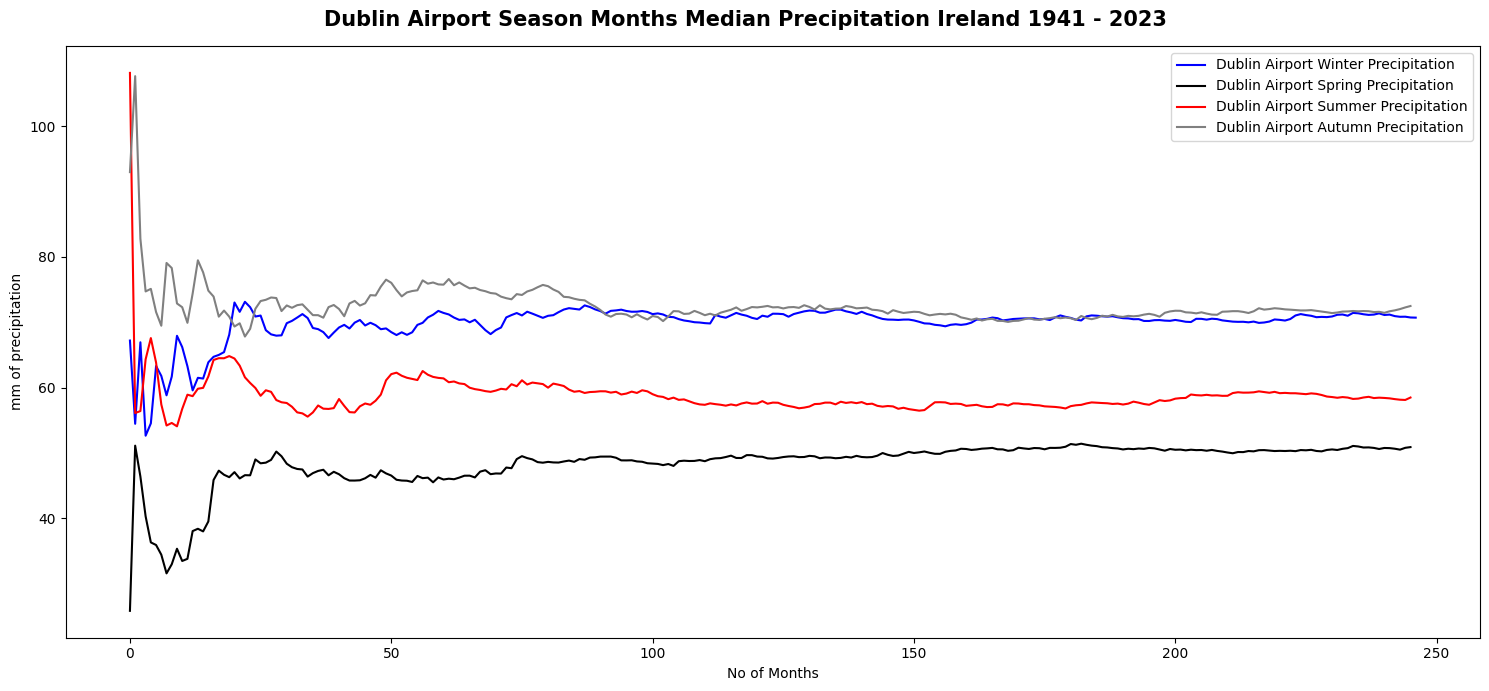

In [320]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(moving_avarage_smoothing(winter['rain'], 250), label = 'Dublin Airport Winter Precipitation', color = 'blue')
ax.plot(moving_avarage_smoothing(spring['rain'], 250), label = 'Dublin Airport Spring Precipitation', color = 'black')
ax.plot(moving_avarage_smoothing(summer['rain'], 250), label = 'Dublin Airport Summer Precipitation', color = 'red')
ax.plot(moving_avarage_smoothing(autumn['rain'], 250), label = 'Dublin Airport Autumn Precipitation', color = 'grey')
ax.set_xlabel("No of Months")
ax.set_ylabel('mm of precipitation')
ax.legend()
plt.suptitle('Dublin Airport Season Months Median Precipitation Ireland 1941 - 2023', weight='bold', size=15)
plt.tight_layout()

---

## Predictive Model <a id="predictive-model"></a>

Wang et al. (2023) forecasted temperature anomaly outcomes for 2050 using AutoRegressive Integrated Moving Average (ARIMA 1, 1, 3) models, based on four different time periods and observations. The longest period studied was from 1850 to 2021. Based on this data a global temperature anomaly of 0.92 was forecast in 2050.

Using global temperature anomaly data for the same period a linear regression model can be created and used to predict the temperature in 2050.

In [321]:
# create a copy of the full global temperature dataset
full_temp_data_training = full_temp_data.copy()

Using iloc the period from 1850 to 2021 is identified.

In [322]:
full_temp_data_training = full_temp_data_training.iloc[1:173]

In [323]:
full_temp_data_training

,year,yr_bp,temp_anomaly,years_before_present
1,2021,-71,0.8500,2
2,2020,-70,1.0200,3
3,2019,-69,0.9800,4
4,2018,-68,0.8500,5
5,2017,-67,0.9200,6
...,...,...,...,...
168,1854,96,-0.1564,169
169,1853,97,-0.2623,170
170,1852,98,-0.3511,171
171,1851,99,-0.4139,172


The data is sorted in ascending order based on the year.

In [324]:
full_temp_data_training = full_temp_data_training.sort_values('year', ascending=True)

A time series is created using the *year* variable.

In [325]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 21 Dec. 2023]
full_temp_data_training['time_series'] = pd.to_datetime(full_temp_data_training['year'], format='%Y')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 21 Dec. 2023].
full_temp_data_training = full_temp_data_training.set_index('time_series')

A time dummy, which counts off time steps in the series from beginning to end, is added to the data frame. This is used to plot the linear regression line.

In [326]:
full_temp_data_training['time'] =  np.arange(len(full_temp_data_training.index))

Using Seaborn's *regplot* the linear regression line is plotted over the actual datapoints.

Text(0.5, 1.0, 'Time Plot of Global Temperature Anomaly 1850 - 2021')

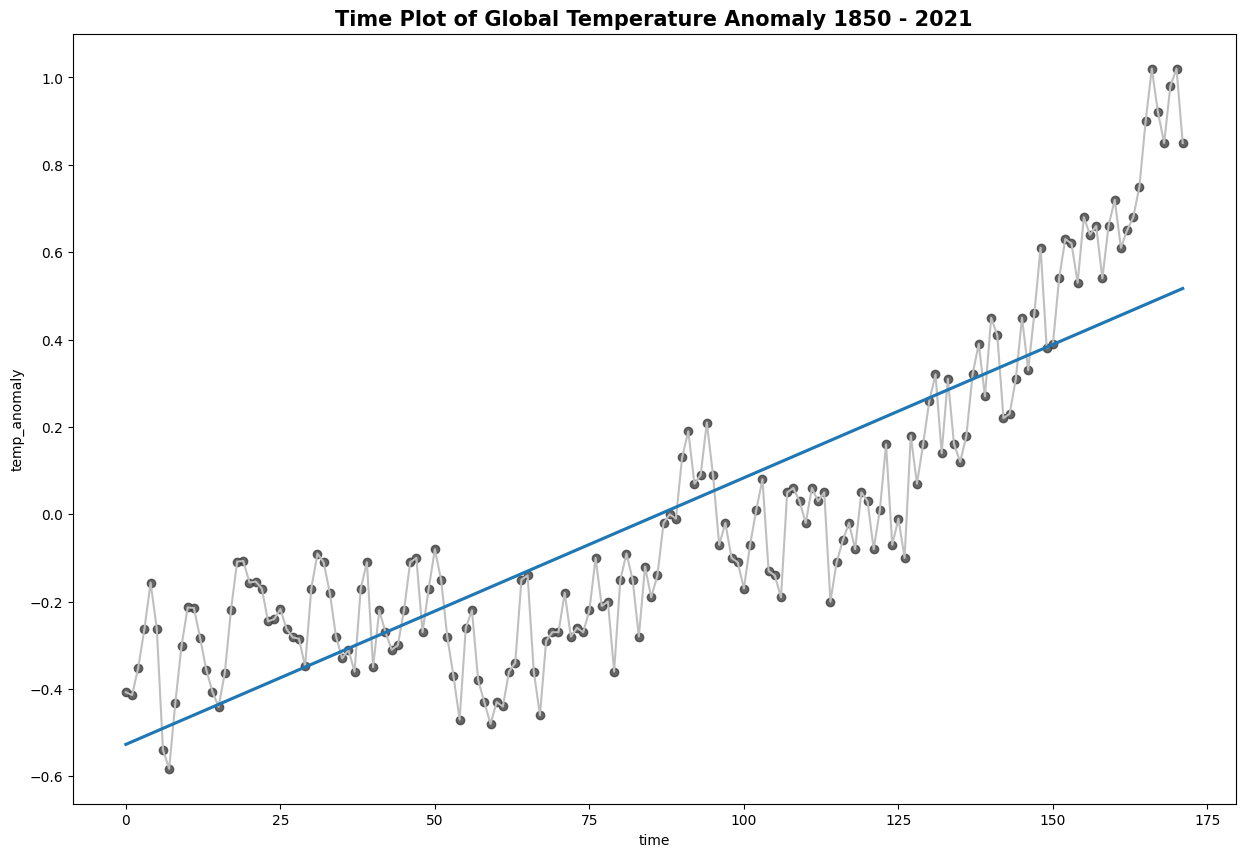

In [327]:
# an empty plot is created
fig, ax = plt.subplots(figsize=(15,10))

# the linear regression line is plotted over the actual datapoints
ax.plot('time', 'temp_anomaly', data=full_temp_data_training, color='0.75')
ax = sns.regplot(x='time', y='temp_anomaly', data=full_temp_data_training, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Global Temperature Anomaly 1850 - 2021', weight = 'bold', size = 15)

A date range time series is created for a synthesised dataset that covers the period from 1850 to 2050. This will be fed into the linear regression model to predict the temperature anomaly in 2050.

In [328]:
# adapted from - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 21 Dec. 2023].
dti = pd.date_range(start="1850", end='2050', freq = 'Y')

The time series is assigned an the index in a Pandas DataFrame.

In [329]:
# Code adapted from - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html [Accessed 13 Nov. 2023].
synthesised_dataset = pd.DataFrame(index=dti)

In [330]:
synthesised_dataset['time'] =  np.arange(len(synthesised_dataset.index))

In [331]:
# code adapted from - https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series [Accessed 21 Dec. 2023].

# Training data
X = full_temp_data_training.loc[:, ['time']]  # features
y = full_temp_data_training.loc[:, 'temp_anomaly']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [332]:
X = synthesised_dataset.loc[:, ['time']]  # features

# Store the fitted values as a time series with the same time index as the synthesised data
y_pred = pd.Series(model.predict(X), index=X.index)

Printing the resultant series indicates that the global temperature anomaly goes from -0.526775 in 1850 to 0.687790 on the 31st of December 2049. Assuming that other variables (CO2 concentrations, methane concentrations, etc.) that are causing the temperature anomaly to change remain as they are now, this equates to $\approx$ 1.2 degrees celsius increase, from 1850, in the global temperature anomaly by 2050.

A predicted global temperature anomaly of 0.68 degrees celsius in 2050 is consistent the the prediction (0.92 degrees celsius) of Wang et al. (2023).

In [333]:
y_pred

1850-12-31   -0.526775
1851-12-31   -0.520671
1852-12-31   -0.514568
1853-12-31   -0.508465
1854-12-31   -0.502361
                ...   
2045-12-31    0.663377
2046-12-31    0.669480
2047-12-31    0.675584
2048-12-31    0.681687
2049-12-31    0.687790
Freq: A-DEC, Length: 200, dtype: float64

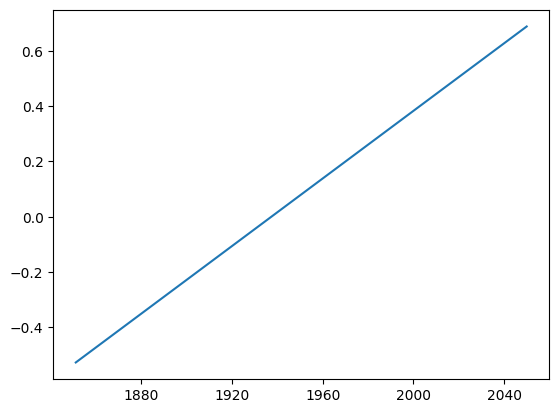

In [334]:
fig, ax = plt.subplots()

ax.plot(y_pred)
plt.show()

---

## References <a id="references"></a>

Annan, J.D. and Hargreaves, J.C. (2013). A new global reconstruction of temperature changes at the Last Glacial Maximum. Climate of the Past, 9(1), pp.367–376. doi:https://doi.org/10.5194/cp-9-367-2013.

Bazin, L., Amaëlle Landais, Bénédicte Lemieux‐Dudon, Toye, H., Veres, D., Frédéric Parrenin, Martinerie, P., Ritz, C., Capron, É., Vladimir Ya. Lipenkov, Marie-France Loutre, Raynaud, D., Vinther, B.M., Svensson, A., Sune Olander Rasmussen, Severi, M., Blunier, T., Leuenberger, M., Fischer, H. and Valérie Masson‐Delmotte (2013). The Antarctic ice core chronology (AICC2012). doi:https://doi.org/10.1594/pangaea.824894.

Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

Bintanja, R., van de Wal, R.S.W. and Oerlemans, J. (2005). Modelled atmospheric temperatures and global sea levels over the past million years. Nature, 437(7055), pp.125–128. doi:https://doi.org/10.1038/nature03975.

climateknowledgeportal.worldbank.org. (n.d.). World Bank Climate Change Knowledge Portal. [online] Available at: https://climateknowledgeportal.worldbank.org/country/ireland/climate-data-historical. [Accessed 20 Dec. 2023].

Dash, S. (2020). Smoothing Techniques for time series data. [online] Medium. Available at: https://medium.com/@srv96/smoothing-techniques-for-time-series-data-91cccfd008a2.[Accessed 21 Dec. 2023].

Etheridge, D. M., Steele, L. P., Francey, R. J., and Langenfelds, R. L., 1998, Atmospheric methane between 1000 A.D. and present: Evidence of anthropogenic emissions and climatic variability J. Geophys. Res. Vol. 103, No. D13, p. 15,979 (98JD00923)

cs95 (2018). Pandas Merging 101. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/53645882/pandas-merging-101. [Accessed 18 Dec. 2023].


GeeksforGeeks. (2018). Python | Pandas DataFrame.astype(). [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/. [Accessed 15 Dec. 2023].

GeeksforGeeks. (2020). Change the line opacity in Matplotlib. [online] Available at: https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/. [Accessed 19 Dec. 2023]

Harmel RD, Richardson CW, Hanson CL, Johnson GL (2002) Evaluating the adequacy of simulating maximum and minimum daily air temperature with the normal distribution. J Appl Meteorol 41(7):744–753. https://doi.org/10.1175/1520-0450(2002)041%3c0744:ETAOSM%3e2.0.CO;2

Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA, https://doi.org/10.1594/PANGAEA.683655

kaggle.com. (n.d.). Linear Regression With Time Series. [online] Available at: https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series. [Accessed 21 Dec. 2023].

Lemieux-Dudon, B., Blayo, E., Petit, J.-R., Waelbroeck, C., Svensson, A., Ritz, C., Barnola, J.-M., Narcisi, B.M. and Parrenin, F. (2010). Consistent dating for Antarctic and Greenland ice cores. Quaternary Science Reviews, 29(1-2), pp.8–20. doi:https://doi.org/10.1016/j.quascirev.2009.11.010.

Lisiecki, L.E. and Raymo, M.E. (2005). A Pliocene-Pleistocene stack of 57 globally distributed benthic δ18O records. Paleoceanography, 20(1), p.n/a-n/a. doi:https://doi.org/10.1029/2004pa001071.

Loulergue, L., Schilt, A., Spahni, R., Masson-Delmotte, V., Blunier, T., Lemieux, B., Barnola, J.-M., Raynaud, D., Stocker, T.F. and Chappellaz, J. (2008). Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, [online] 453(7193), pp.383–386. doi:https://doi.org/10.1038/nature06950.

Lüthi, D., Le Floch, M., Bereiter, B., Blunier, T., Barnola, J.-M., Siegenthaler, U., Raynaud, D., Jouzel, J., Fischer, H., Kawamura, K. and Stocker, T.F. (2008). High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature, 453(7193), pp.379–382. doi:https://doi.org/10.1038/nature06949.

Marcott, S.A., Shakun, J.D., Clark, P.U. and Mix, A.C. (2013). A Reconstruction of Regional and Global Temperature for the Past 11,300 Years. Science, 339(6124), pp.1198–1201. doi:https://doi.org/10.1126/science.1228026.

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

Naveen (2022). How to Rename Columns With List in Pandas. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/rename-columns-with-list-in-pandas-dataframe/ [Accessed 13 Dec. 2023].

pandas.pydata.org. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. [ Accessed 21 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.concat — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.concat.html. [Accessed 13 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.drop — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html. [Accessed 13 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.date_range — pandas 2.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 21 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.to_datetime — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html. [Accessed 21 Dec. 2023].

Parrenin, F., Barnola, J.-M. ., Beer, J., Blunier, T., Castellano, E., Chappellaz, J., Dreyfus, G., Fischer, H., Fujita, S., Jouzel, J., Kawamura, K., Lemieux-Dudon, B., Loulergue, L., Masson-Delmotte, V., Narcisi, B., Petit, J.-R. ., Raisbeck, G., Raynaud, D., Ruth, U. and Schwander, J. (2007). The EDC3 chronology for the EPICA Dome C ice core. Climate of the Past, 3(3), pp.485–497. doi:https://doi.org/10.5194/cp-3-485-2007.

practicaldatascience.co.uk. (2022). How to reorder Pandas dataframe columns. [online] Available at: https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns. [Accessed 13 Dec. 2023].

saturncloud.io. (2023). How to Sort Pandas DataFrame by One or Multiple Column | Saturn Cloud Blog. [online] Available at: https://saturncloud.io/blog/
how-to-sort-pandas-dataframe-from-one-column/ [Accessed 13 Dec. 2023].

Shakun, J.D., Clark, P.U., He, F., Marcott, S.A., Mix, A.C., Liu, Z., Otto-Bliesner, B., Schmittner, A. and Bard, E. (2012). Global warming preceded by increasing carbon dioxide concentrations during the last deglaciation. Nature, [online] 484(7392), pp.49–54. doi:https://doi.org/10.1038/nature10915.

Snyder, C.W. (2016). Evolution of global temperature over the past two million years. Nature, [online] 538(7624), pp.226–228. doi:https://doi.org/10.1038/nature19798.

Stack Overflow. (n.d.). Cleanly combine year and month columns to single date column with pandas. [online] Available at: https://stackoverflow.com/questions/48304927/cleanly-combine-year-and-month-columns-to-single-date-column-with-pandas [Accessed 21 Dec. 2023].

Stack Overflow. (n.d.). How do I get a list of all the duplicate items using pandas in python? [online] Available at: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python [Accessed 22 Dec. 2023].
‌
Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr. [Accessed 21 Dec. 2023].

Stack Overflow. (n.d.). How to find the lag between two time series using cross-correlation. [online] Available at: https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation [Accessed 21 Dec. 2023].

Stack Overflow. (n.d.). Reading tab-delimited file with Pandas - works on Windows, but not on Mac. [online] Available at: https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac [Accessed 15 Dec. 2023].

Stack Overflow. (n.d.). Secondary axis with twinx(): how to add to legend. [online] Available at: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend. [Accessed 21 Dec. 2023]

US EPA (2022). Importance of Methane. [online] US EPA. Available at: https://www.epa.gov/gmi/importance-methane. [Accessed 18 Dec. 2023]

Veres, D., Bazin, L., Landais, A., Toyé Mahamadou Kele, H., Lemieux-Dudon, B., Parrenin, F., Martinerie, P., Blayo, E., Blunier, T., Capron, E., Chappellaz, J., Rasmussen, S.O., Severi, M., Svensson, A., Vinther, B. and Wolff, E.W. (2013). The Antarctic ice core chronology (AICC2012): an optimized multi-parameter and multi-site dating approach for the last 120 thousand years. Climate of the Past, 9(4), pp.1733–1748. doi:https://doi.org/10.5194/cp-9-1733-2013.

Wang, L., Wang, L., Li, Y. and Wang, J. (2023). A century-long analysis of global warming and earth temperature using a random walk with drift approach. Decision Analytics Journal, [online] 7, p.100237. doi:https://doi.org/10.1016/j.dajour.2023.100237.

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

www.digitalocean.com. (n.d.). Pandas read_excel() - Reading Excel File in Python | DigitalOcean. [online] Available at: https://www.digitalocean.com/community/tutorials/pandas-read_excel-reading-excel-file-in-python. [19 Dec. 2023].

www.ncei.noaa.gov. (n.d.). Global Surface Temperature Anomalies | National Centers for Environmental Information (NCEI). [online] Available at: https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/.

www.shanelynn.ie. (n.d.). iloc, loc, and ix for data selection in Python Pandas | Shane Lynn. [online] Available at: https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/. [Accessed 19 Dec. 2023].

---

## Associated Reading <a id="associated-reading"></a>

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 13 Dec. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 13 Dec. 2023].

---

Notebook Ends